# Patoloji Sonuclarına Gore Gogus Kanserinin Iyı Huylu mu Kotu Huylu mu oldugunu tahmin Eden Uygulamanının Gelistirilmesi

Bu veri setindeki Özellikler, bir meme kitlesinin ince iğne aspiratının (İİA) sayısallaştırılmış görüntüsünden hesaplanmıştır. İnce İğne Aspirasyonu (İİA), genellikle meme dokularında bulunan şüpheli bir kitle veya yumrudan analiz için hücre toplamak için kullanılan minimal invaziv bir tıbbi prosedürdür. FNA sırasında, küçük bir hücre örneği çıkarmak için kitleye ince, içi boş bir iğne yerleştirilir. Bu prosedür, doğruluğu sağlamak için tipik olarak ultrason kılavuzluğunda gerçekleştirilir ve hem iyi huylu (kanserli olmayan) hem de kötü huylu (kanserli) durumları değerlendirmek için kullanılabilir. 

Toplanan hücreler daha sonra mikroskopik olarak incelenir ve lezyonun doğası hakkında önemli bilgiler sağlayarak sağlık uzmanlarının daha ileri testler veya tedavi seçenekleri hakkında bilinçli kararlar vermesine yardımcı olabilir. İİAB, diğer cerrahi biyopsilere kıyasla basitliği, hızı ve minimal rahatsızlığı nedeniyle tercih edilmektedir. 

Bu veri kümesi bağlamında, İİAB örneklerinin sayısallaştırılmış görüntülerinden elde edilen özellikler, hücre çekirdeklerinin çeşitli özelliklerini yakalar. Bu özellikler, kanserli lezyonun iyi huylu mu yoksa kötü huylu mu olduğunu belirlemede çok önemli olan boyut, şekil, doku ve düzensizlik derecesi gibi ölçümleri içerebilir.

In [313]:
# Importing libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings  

warnings.filterwarnings('ignore')  

In [4]:
# pip install cufflinks

In [5]:
## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [6]:
# pip install termcolor

In [7]:
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
from matplotlib.cm import get_cmap

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [9]:
# Create a DataFrame  
df = pd.DataFrame(X, columns=data.feature_names)  
df['diagnosis'] = y  

In [10]:
def invert_diagnosis(df):
    # Diagnosis sütunundaki 0'ları 1 ve 1'leri 0 yap
    df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 0 else 0)
    return df
invert_diagnosis(df)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [11]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 31 columns]

# Exploring Features and Correlation

In [14]:

df.shape 

(569, 31)

In [15]:
# Data set hakkında genel bilgi ediniyoruz
df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
# Null değerlerin sayısını buluyoruz 
df.isnull().sum() 
# df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [17]:
# Duplicate değerleri var mı diye kontrol ediyoruz  
df.duplicated().sum()  


0

In [18]:
df.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [19]:
#sutun isimlerinde arada bosluk olanları _ ile değistiiriyoruz
df.columns = df.columns.str.replace(' ', '_')

In [20]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

Bu veri kümesi, memede kanser tanısı ile ilgili bilgiler içeren bir dizi özellik barındırmaktadır. Her bir sütun, kanser hastalarının çeşitli fiziksel özelliklerini ve bu özelliklerin ölçümlerini temsil eder. İşte sütunlar hakkında kısa bir açıklama:

1. **id**: Her hastaya veya ölçüme özgü bir kimlik numarası.

2. **diagnosis**: Hastanın kanser durumu; genellikle 'M' (malign - kötü huylu) veya 'B' (benign - iyi huylu) olarak kodlanmış.

3. **mean_radius**: Meme kütlesinin ortalama yarıçapı.

4. **mean_texture**: Meme kütlesinin ortalama doku değeri.

5. **mean_perimeter**: Meme kütlesinin ortalama çevresi.

6. **mean_area**: Meme kütlesinin ortalama alanı.

7. **smoothness_mean**: Meme kütlesinin ortalama pürüzsüzlük değeri; yüzey düzgünlüğünün ölçüsü.

8. **compactness_mean**: Meme kütlesinin ortalama yoğunluk derecesi; çevre karesi ve alan arasındaki ilişkiyi gösterir.

9. **concavity_mean**: Meme kütlesinin ortalama çukurluk derecesi; çukurluk veya içe çökme miktarını yansıtır.

10. **concave points_mean**: Ortalama çukur noktalarının sayısı; kütledeki içe doğru bölgelerin sayısını gösterir.

11. **symmetry_mean**: Kütlenin ortalama simetrikliğini gösteren bir ölçü.

12. **fractal_dimension_mean**: Kütlenin ortalama karmaşıklık ve düzensizlik derecesi; fraktal boyutu.

13. **radius_se**: Yarıçap ölçümlerinin standart hatası; ölçüm belirsizliğini ifade eder.

14. **texture_se**: Doku ölçümünün standart hatası.

15. **perimeter_se**: Çevre ölçümünün standart hatası.

16. **area_se**: Alan ölçümünün standart hatası.

17. **smoothness_se**: Pürüzsüzlük ölçümünün standart hatası.

18. **compactness_se**: Yoğunluk ölçümünün standart hatası.

19. **concavity_se**: Çukurluk ölçümünün standart hatası.

20. **concave points_se**: Çukur noktalarının sayısının standart hatası.

21. **symmetry_se**: Simetri ölçümünün standart hatası.

22. **fractal_dimension_se**: Fraktal boyut ölçümünün standart hatası.

23. **radius_worst**: En kötü durumdaki (en büyük) yarıçap ölçümü.

24. **texture_worst**: En kötü durumdaki (en büyük) doku ölçümü.

25. **perimeter_worst**: En kötü durumdaki (en büyük) çevre ölçümü.

26. **area_worst**: En kötü durumdaki (en büyük) alan ölçümü.

27. **smoothness_worst**: En kötü durumdaki (en büyük) pürüzsüzlük ölçümü.

28. **compactness_worst**: En kötü durumdaki (en büyük) yoğunluk ölçümü.

29. **concavity_worst**: En kötü durumdaki (en büyük) çukurluk ölçümü.

30. **concave points_worst**: En kötü durumdaki (en büyük) çukur noktası sayısı.

31. **symmetry_worst**: En kötü durumdaki (en büyük) simetri ölçümü.

32. **fractal_dimension_worst**: En kötü durumdaki (en büyük) fraktal boyut ölçümü.


Bu özellikler, memede kanser teşhisi için önemli değişkenlerdir. Makine öğrenimi ve istatistiksel analiz, bu veriler üzerinden tanı koyma, tahmin yapma veya hastaların risk sınıflandırması gibi işlemleri gerçekleştirmek için kullanılabilir.

In [23]:
# sayısal değişkenlerin istatistiksel değerlerini inceliyoruz 
df.describe().T 

count        mean         std         min  \
mean_radius              569.0   14.127292    3.524049    6.981000   
mean_texture             569.0   19.289649    4.301036    9.710000   
mean_perimeter           569.0   91.969033   24.298981   43.790000   
mean_area                569.0  654.889104  351.914129  143.500000   
mean_smoothness          569.0    0.096360    0.014064    0.052630   
mean_compactness         569.0    0.104341    0.052813    0.019380   
mean_concavity           569.0    0.088799    0.079720    0.000000   
mean_concave_points      569.0    0.048919    0.038803    0.000000   
mean_symmetry            569.0    0.181162    0.027414    0.106000   
mean_fractal_dimension   569.0    0.062798    0.007060    0.049960   
radius_error             569.0    0.405172    0.277313    0.111500   
texture_error            569.0    1.216853    0.551648    0.360200   
perimeter_error          569.0    2.866059    2.021855    0.757000   
area_error               569.0   40.337079   45.491006    6.802000   
smoothness_error         569.0    0.007041    0.003003    0.001713   
compactness_error        569.0    0.025478    0.017908    0.002252   
concavity_error          569.0    0.031894    0.030186    0.000000   
concave_points_error     569.0    0.011796    0.006170    0.000000   
symmetry_error           569.0    0.020542    0.008266    0.007882   
fractal_dimension_error  569.0    0.003795    0.002646    0.000895   
worst_radius             569.0   16.269190    4.833242    7.930000   
worst_texture            569.0   25.677223    6.146258   12.020000   
worst_perimeter          569.0  107.261213   33.602542   50.410000   
worst_area               569.0  880.583128  569.356993  185.200000   
worst_smoothness         569.0    0.132369    0.022832    0.071170   
worst_compactness        569.0    0.254265    0.157336    0.027290   
worst_concavity          569.0    0.272188    0.208624    0.000000   
worst_concave_points     569.0    0.114606    0.065732    0.000000   
worst_symmetry           569.0    0.290076    0.061867    0.156500   
worst_fractal_dimension  569.0    0.083946    0.018061    0.055040   
diagnosis                569.0    0.372583    0.483918    0.000000   

                                25%         50%          75%         max  
mean_radius               11.700000   13.370000    15.780000    28.11000  
mean_texture              16.170000   18.840000    21.800000    39.28000  
mean_perimeter            75.170000   86.240000   104.100000   188.50000  
mean_area                420.300000  551.100000   782.700000  2501.00000  
mean_smoothness            0.086370    0.095870     0.105300     0.16340  
mean_compactness           0.064920    0.092630     0.130400     0.34540  
mean_concavity             0.029560    0.061540     0.130700     0.42680  
mean_concave_points        0.020310    0.033500     0.074000     0.20120  
mean_symmetry              0.161900    0.179200     0.195700     0.30400  
mean_fractal_dimension     0.057700    0.061540     0.066120     0.09744  
radius_error               0.232400    0.324200     0.478900     2.87300  
texture_error              0.833900    1.108000     1.474000     4.88500  
perimeter_error            1.606000    2.287000     3.357000    21.98000  
area_error                17.850000   24.530000    45.190000   542.20000  
smoothness_error           0.005169    0.006380     0.008146     0.03113  
compactness_error          0.013080    0.020450     0.032450     0.13540  
concavity_error            0.015090    0.025890     0.042050     0.39600  
concave_points_error       0.007638    0.010930     0.014710     0.05279  
symmetry_error             0.015160    0.018730     0.023480     0.07895  
fractal_dimension_error    0.002248    0.003187     0.004558     0.02984  
worst_radius              13.010000   14.970000    18.790000    36.04000  
worst_texture             21.080000   25.410000    29.720000    49.54000  
worst_perimeter           84.110000   97.660000   125.40000

In [24]:
df.duplicated().sum()

0

In [25]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

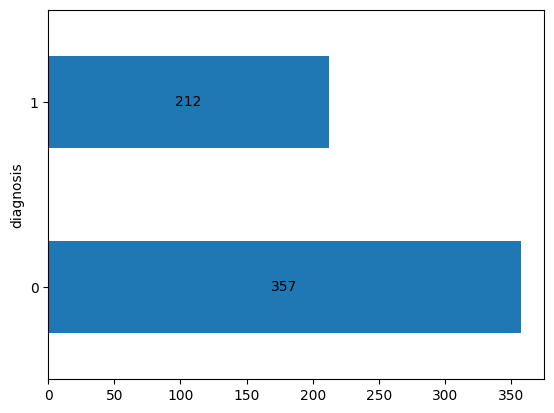

In [26]:
# Veri setindeki target sutunun dağılımını inceleyelim 
ax = df['diagnosis'].value_counts().plot(kind ="barh")
ax.bar_label(ax.containers[0], label_type='center');   # label_type='edge'

C:\Users\User\AppData\Local\Temp\ipykernel_7728\3918744644.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



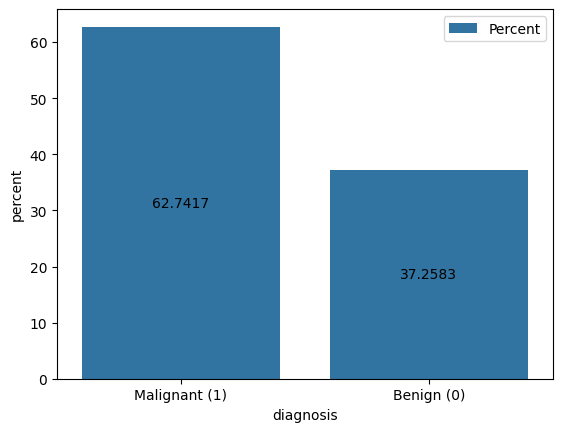

In [27]:
# Veri setindeki target sutunun dağılımını yüzde olarak inceleyelim 
ax = sns.countplot(x=df.diagnosis, label="Percent", stat='percent')  
ax.set_xticklabels(['Malignant (1)', 'Benign (0)'])  
ax.bar_label(ax.containers[0], label_type='center')  
plt.show()

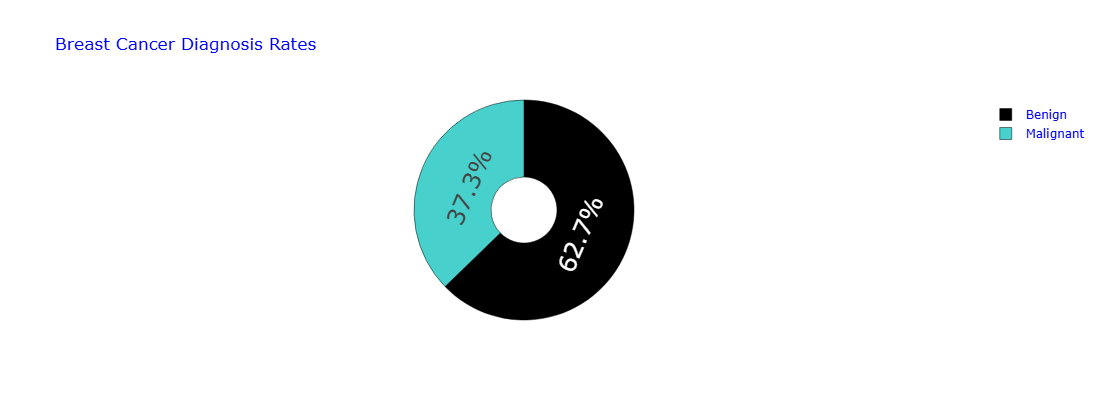

In [28]:
# Veri setindeki target sutunun dağılımını yüzde olarak pasta turunde inceleyelim
colors = ['black', 'mediumturquoise']
labels = ['Benign','Malignant']
values = df['diagnosis'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(textfont_size=24, marker=dict(colors=colors, line=dict(color='black', width=0.5)))
fig.update_layout(
    title_text="Breast Cancer Diagnosis Rates",
    title_font_color="blue",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="blue",
    height=400,
    width=600,
)
fig.show()

In [29]:
# Number turundeki sutunları seciyoruz 
numeric_df = df.select_dtypes(include=['number'])  


In [30]:
 
numeric_features = numeric_df.columns

In [31]:
numeric_features

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

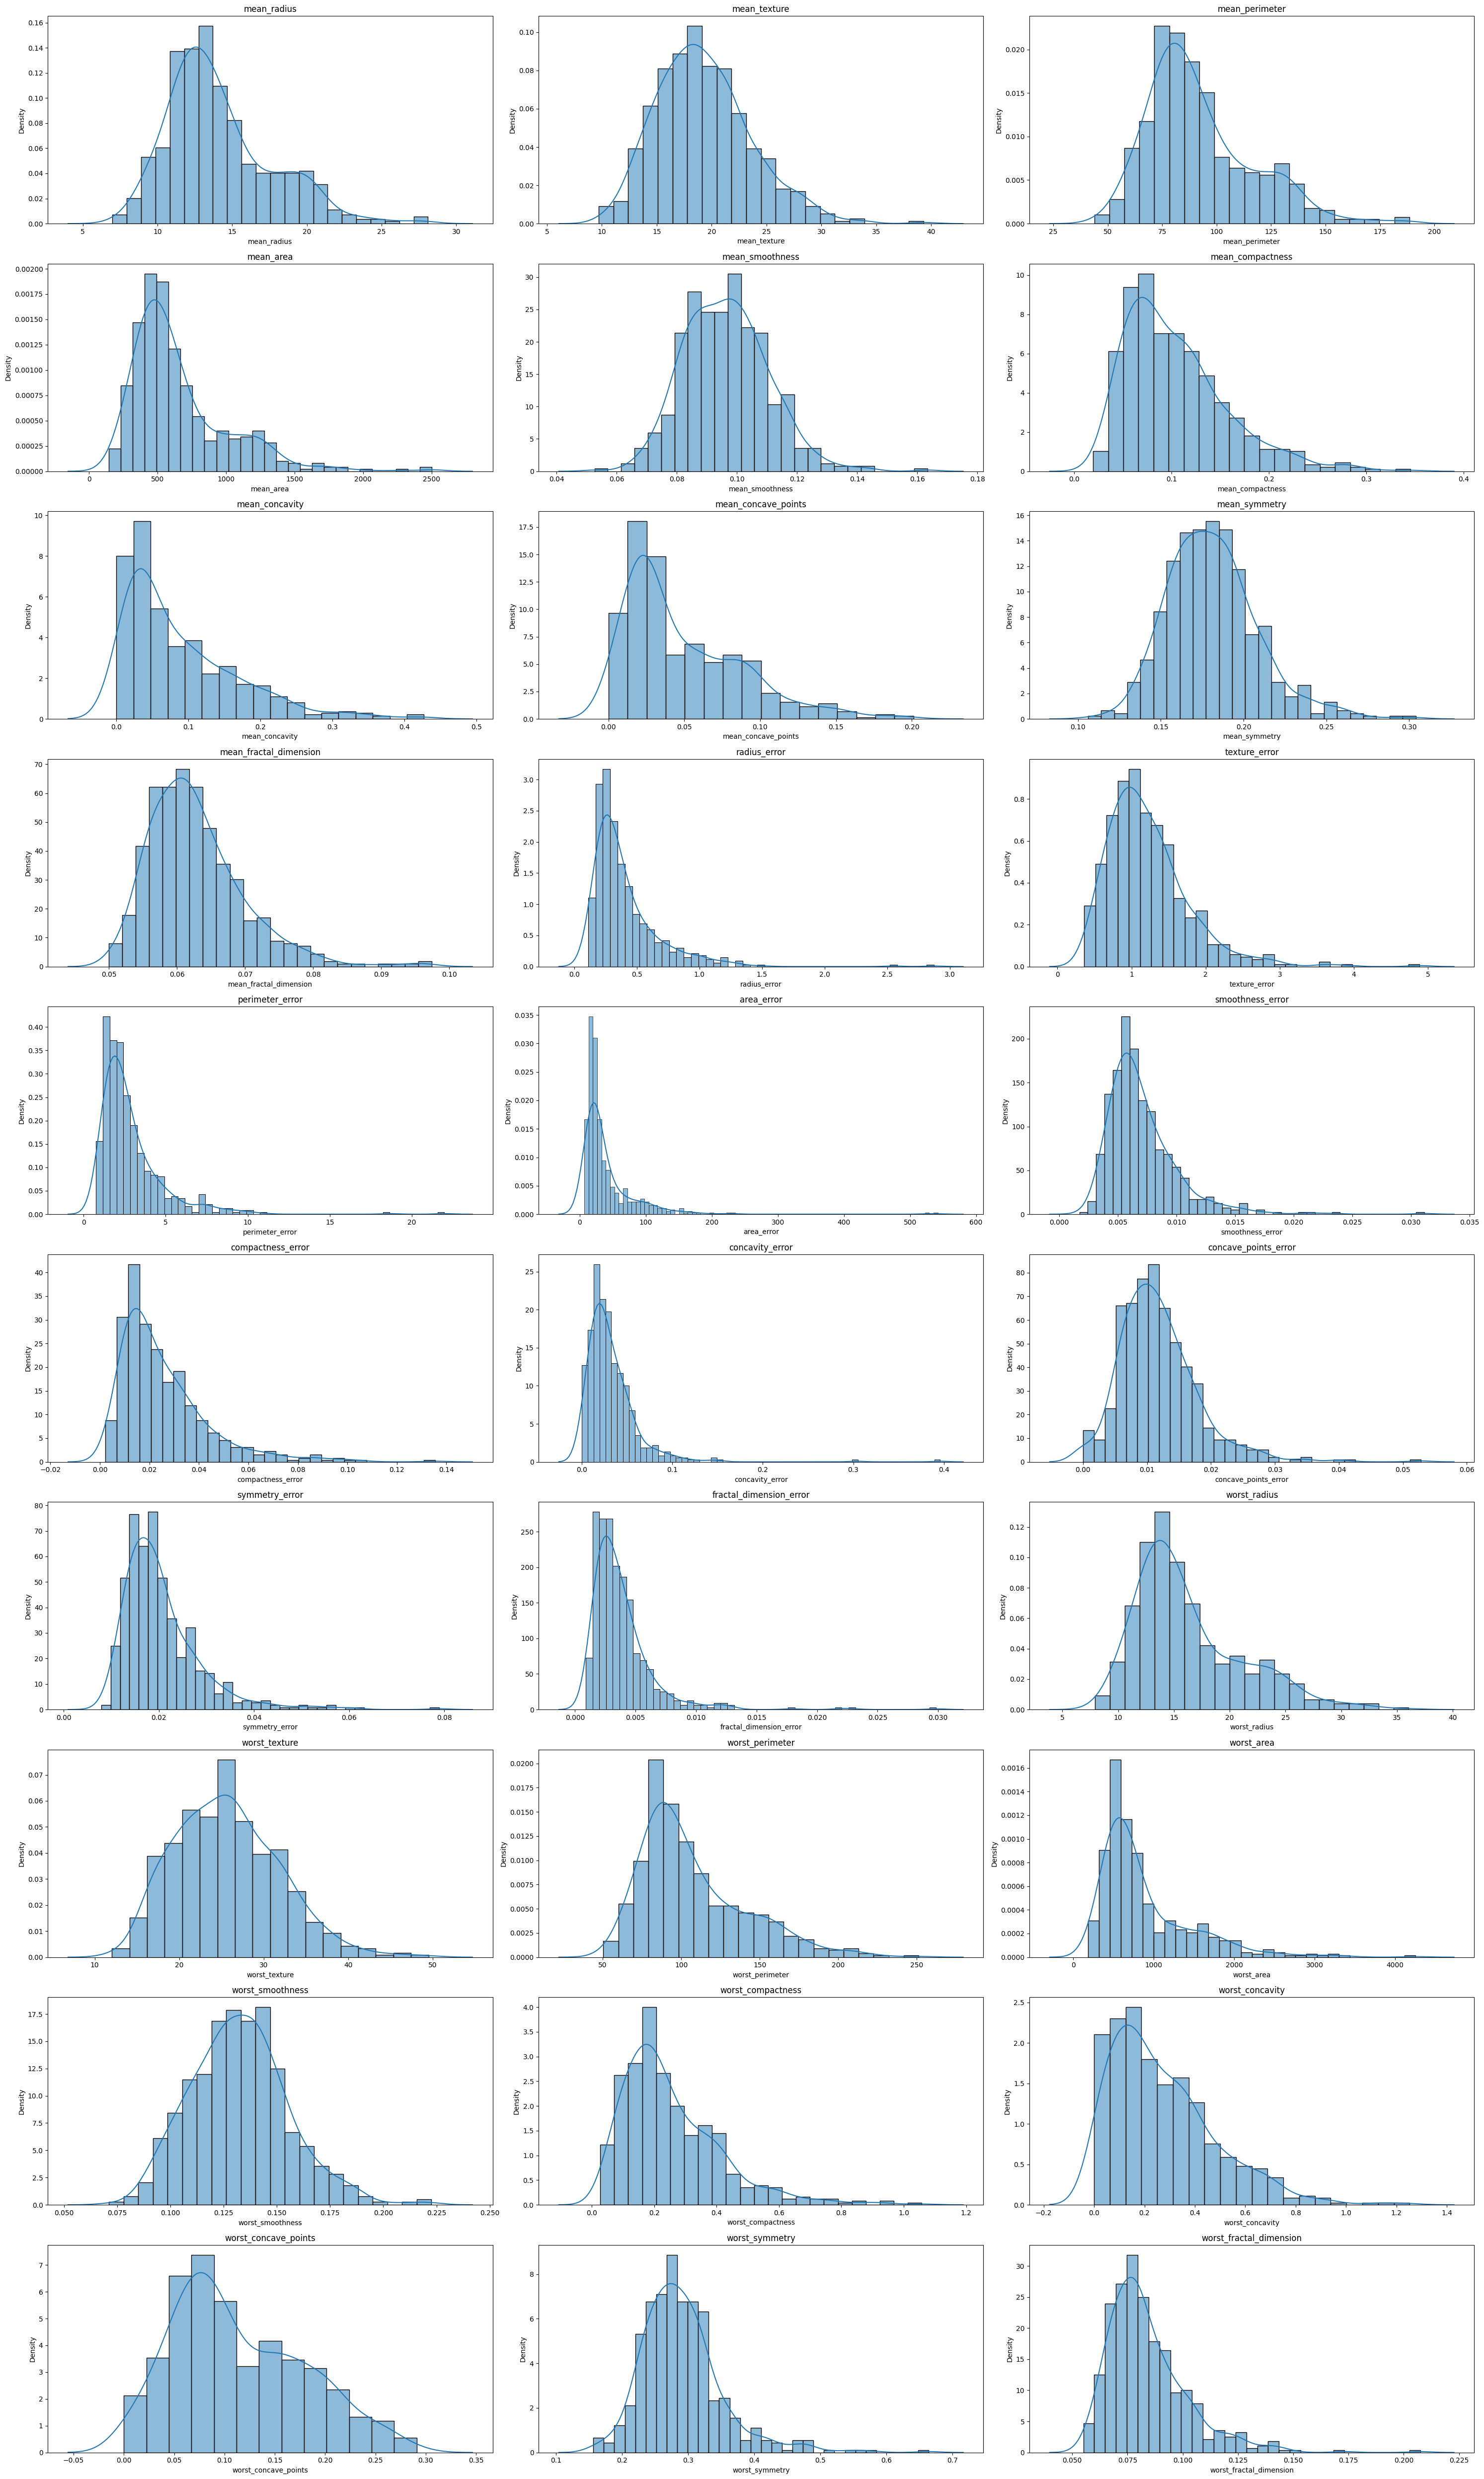

In [32]:
# Veri setindeki sayısal değişkenlerin histogramlarını çizdiriyoruz
num_plots = min(len(numeric_features), 30) 
plt.figure(figsize=(30, 50))   

for i, col in enumerate(numeric_features[:num_plots], 1):  # Only loop through the available or specified features  
    plt.subplot(10, 3, i)  # 10 rows and 3 columns to accommodate up to 30 plots  
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))  
    plt.title(col)  # Optionally add title for each subplot  

plt.tight_layout()  # Adjust layout  
plt.show()  # Show the plots

In [33]:
df.columns


Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

<Figure size 1800x1000 with 0 Axes>

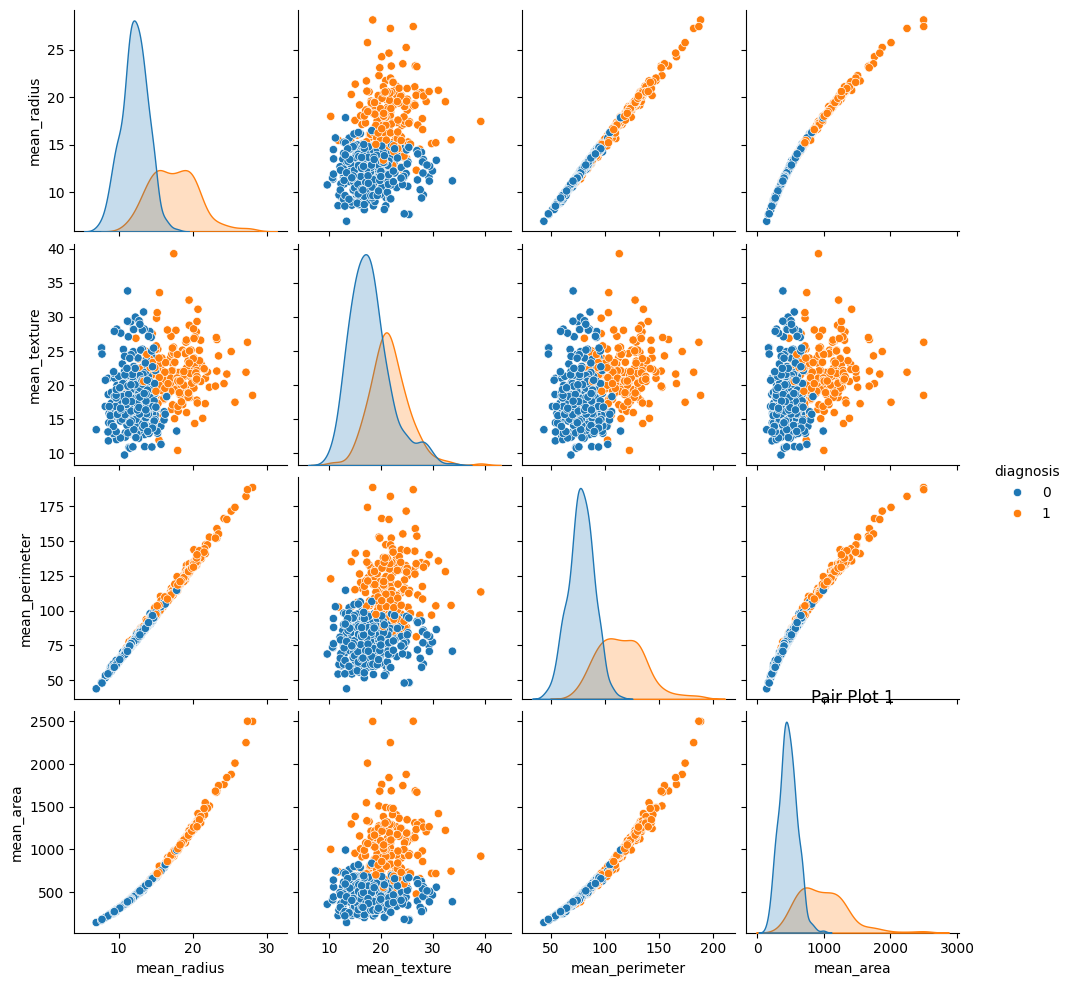

<Figure size 1800x1000 with 0 Axes>

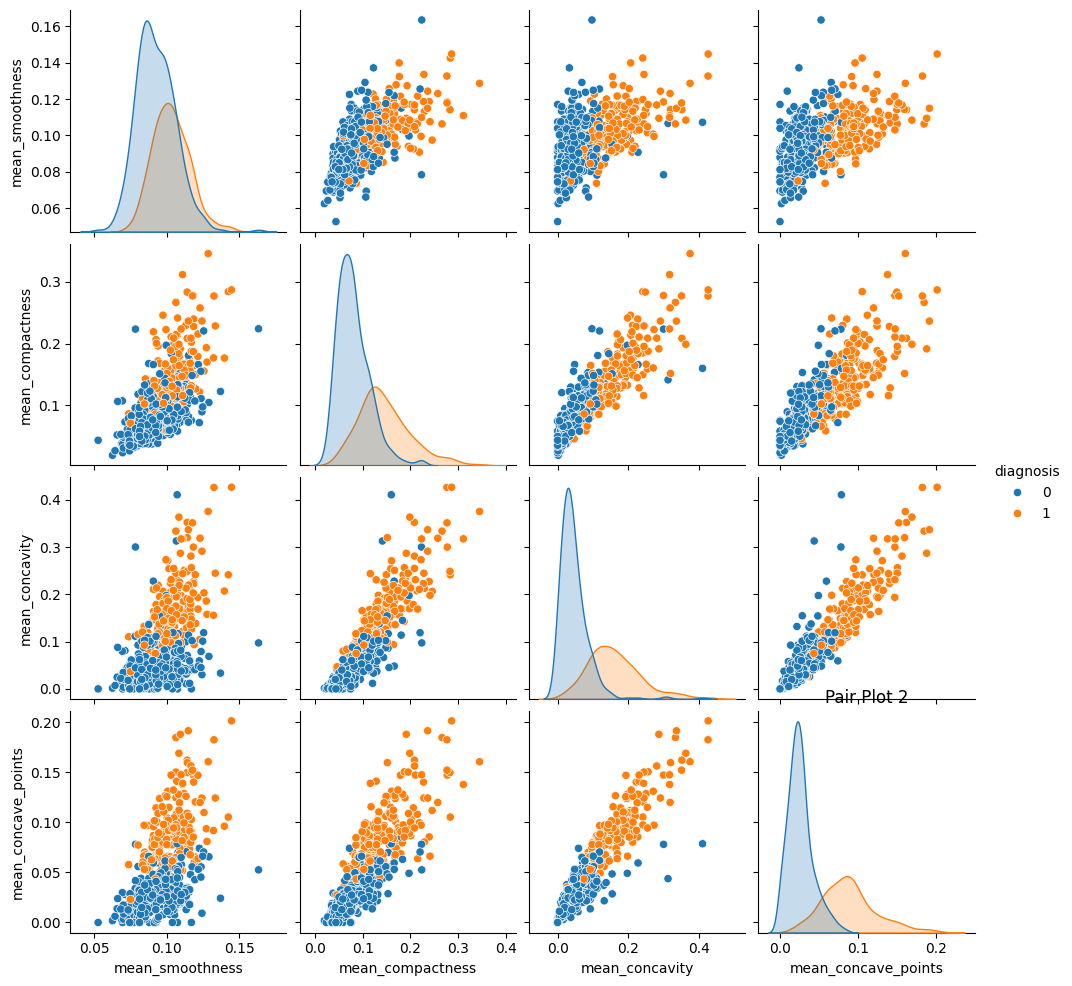

<Figure size 1800x1000 with 0 Axes>

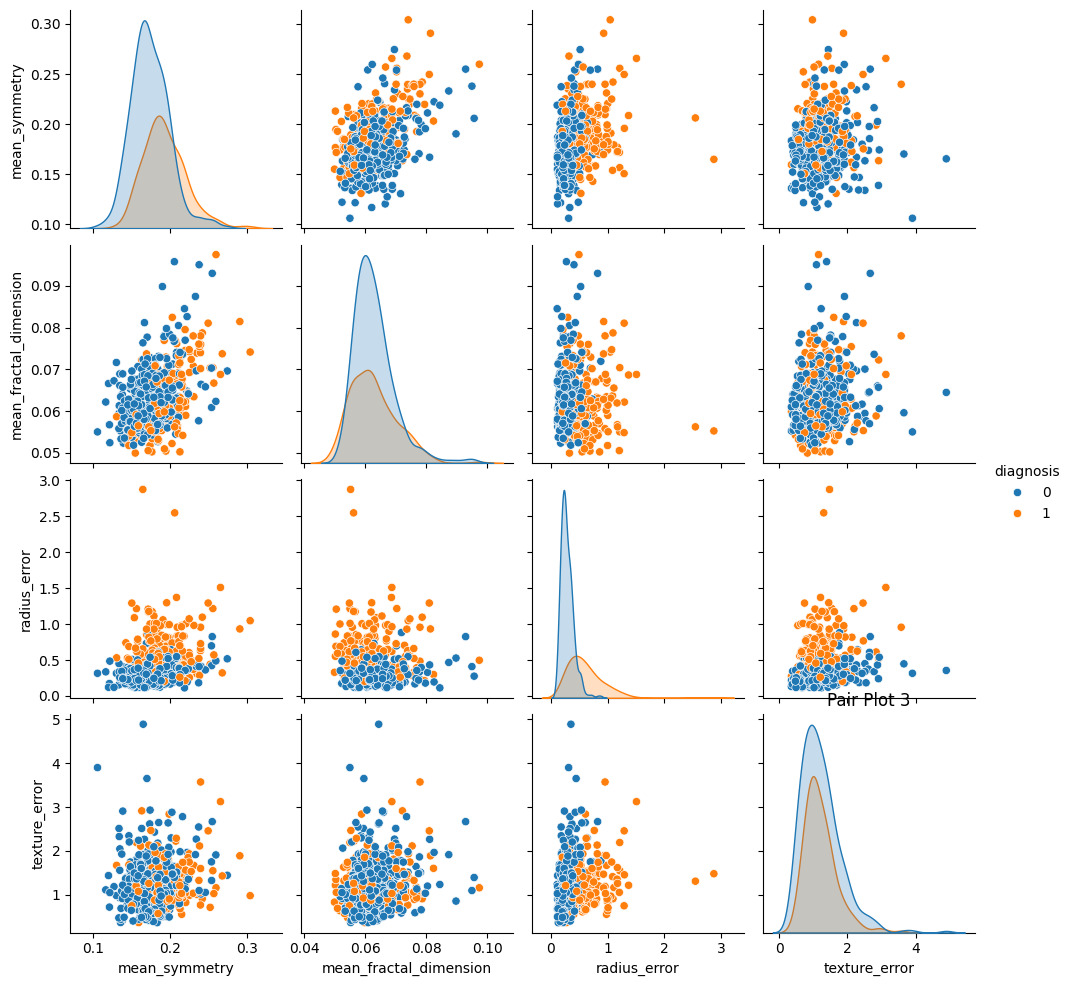

<Figure size 1800x1000 with 0 Axes>

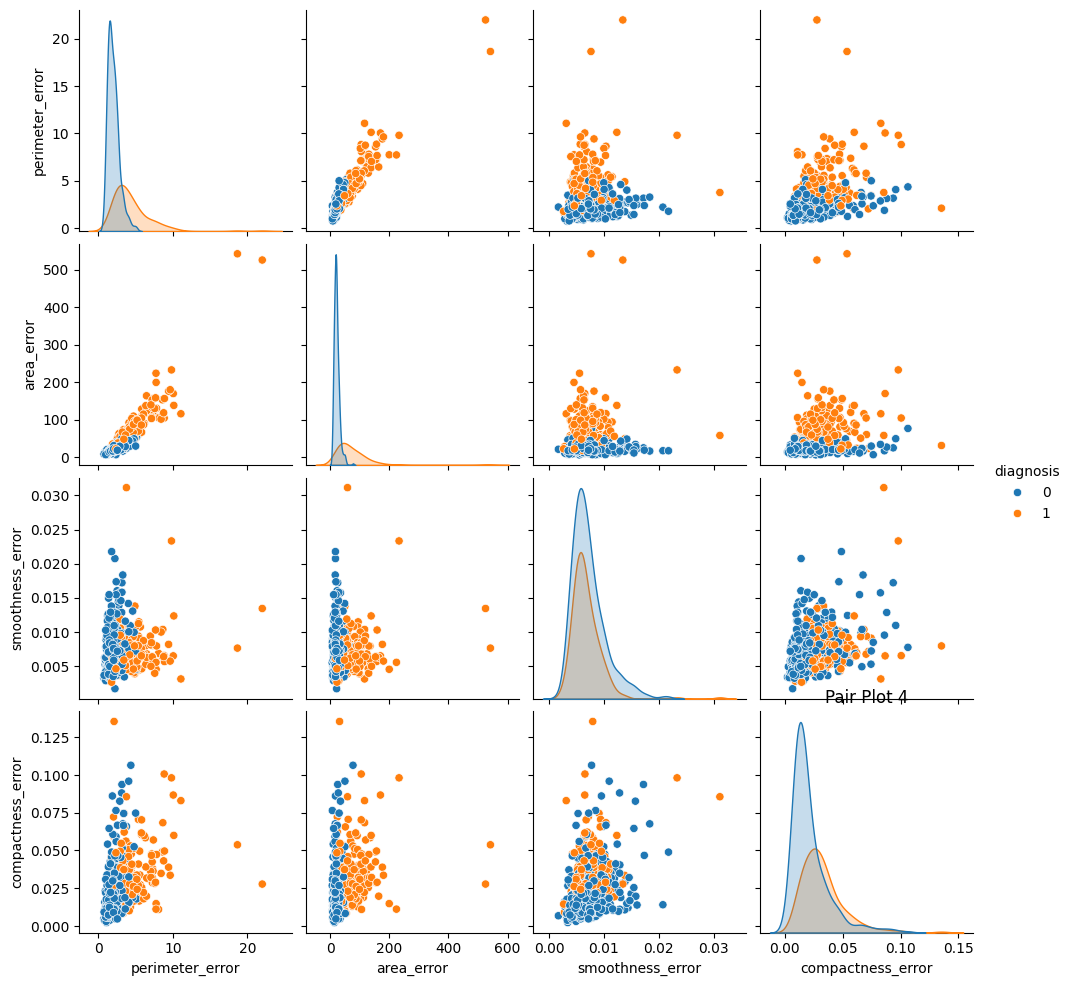

<Figure size 1800x1000 with 0 Axes>

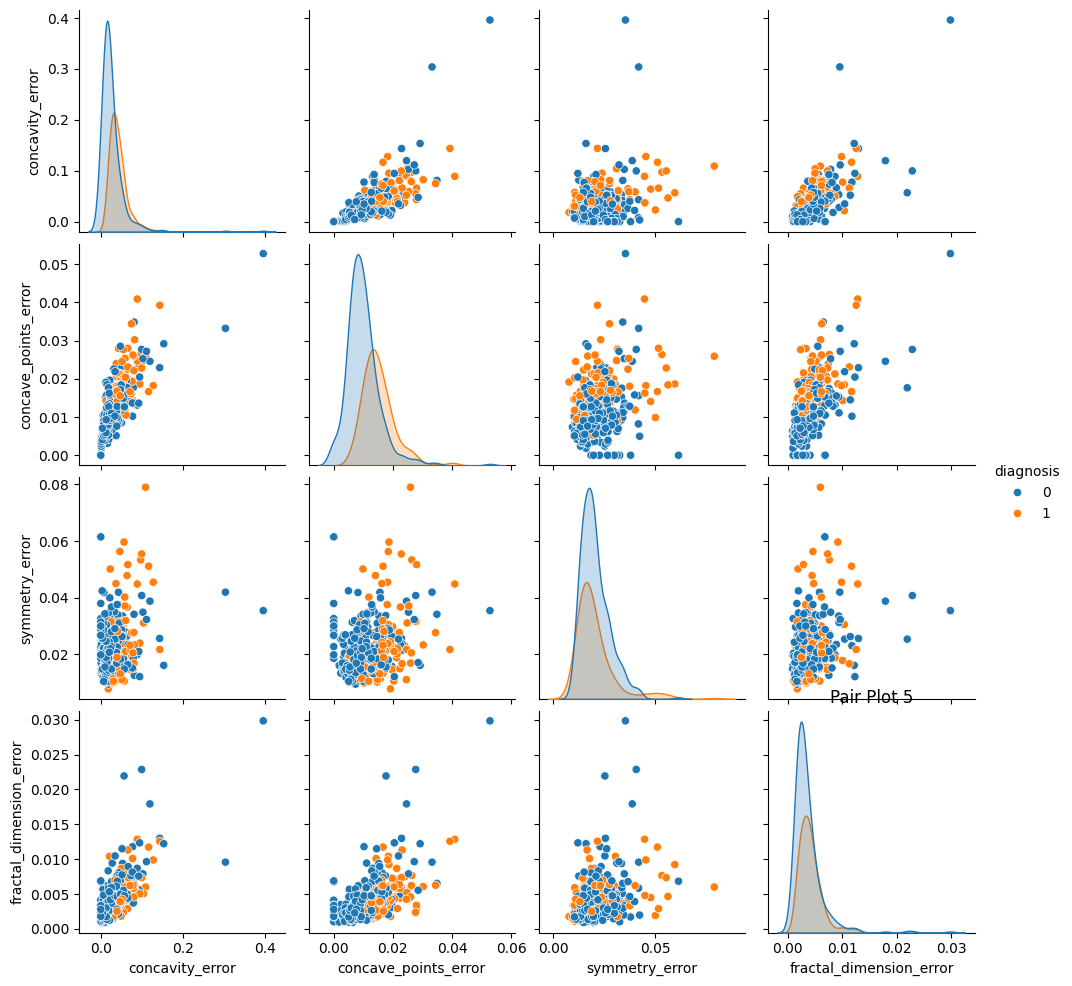

<Figure size 1800x1000 with 0 Axes>

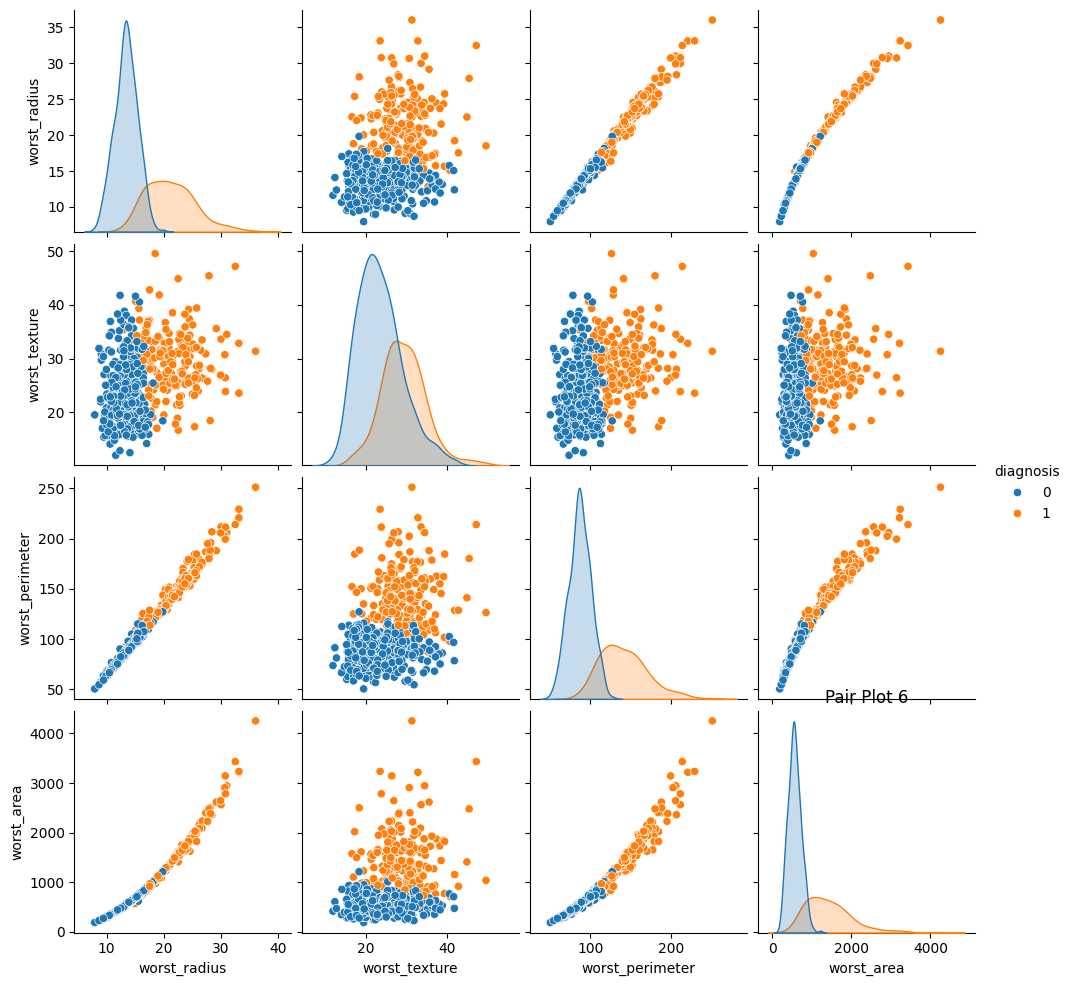

<Figure size 1800x1000 with 0 Axes>

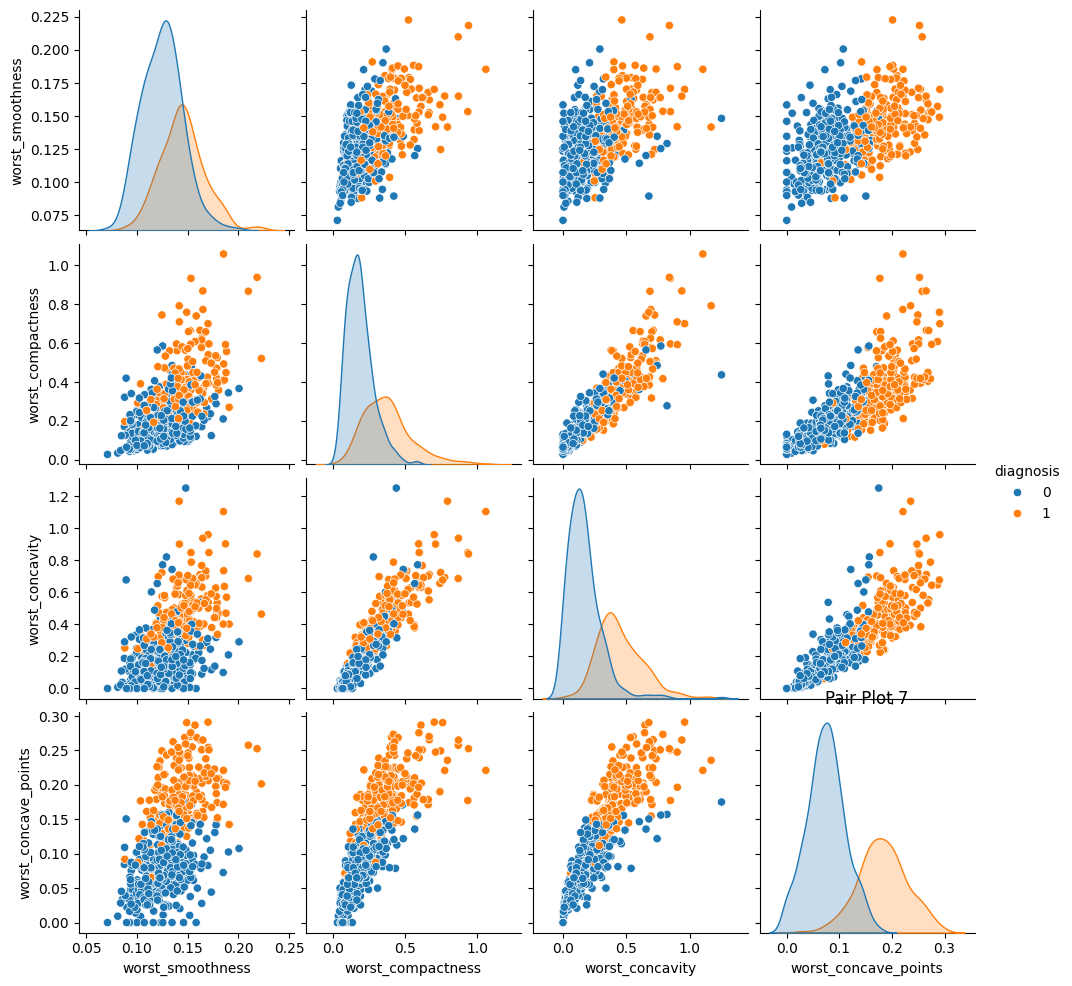

<Figure size 1800x1000 with 0 Axes>

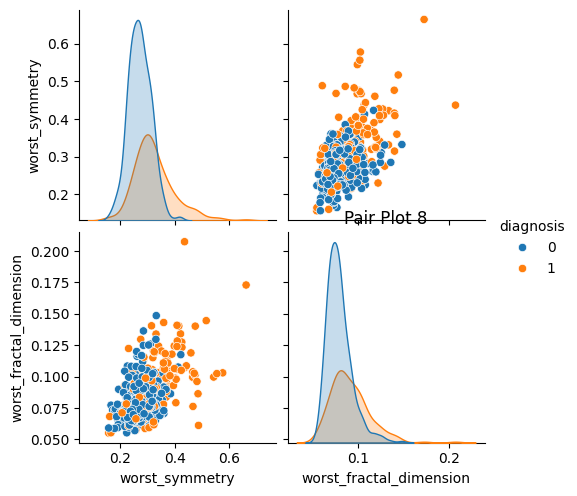

In [34]:
import seaborn as sns  
import matplotlib.pyplot as plt  

#Veri setindeki sayısal değişkenlerin birbirleri ile olan ilişkilerini gösteren pairplot grafiğini çizdiriyoruz 
num_plots = 8  
fig_size = (18, 10)  

# Determine the number of numeric columns (excluding 'diagnosis')  
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[:-1]  # Exclude last column  

# Number of columns per plot  
cols_per_plot = len(numeric_cols) // num_plots + (len(numeric_cols) % num_plots > 0)  

# Create a figure for pair plots  
for i in range(num_plots):  
    # Select a subset of columns for this pair plot  
    start = i * cols_per_plot  
    end = start + cols_per_plot  
    subset = numeric_cols[start:end]  

    # Check if remaining columns are less than the cols_per_plot  
    if len(subset) > 0:  
        plt.figure(figsize=fig_size)  
        sns.pairplot(df[subset.tolist() + ['diagnosis']], hue='diagnosis')  
        plt.title(f'Pair Plot {i+1}')  
        plt.show();

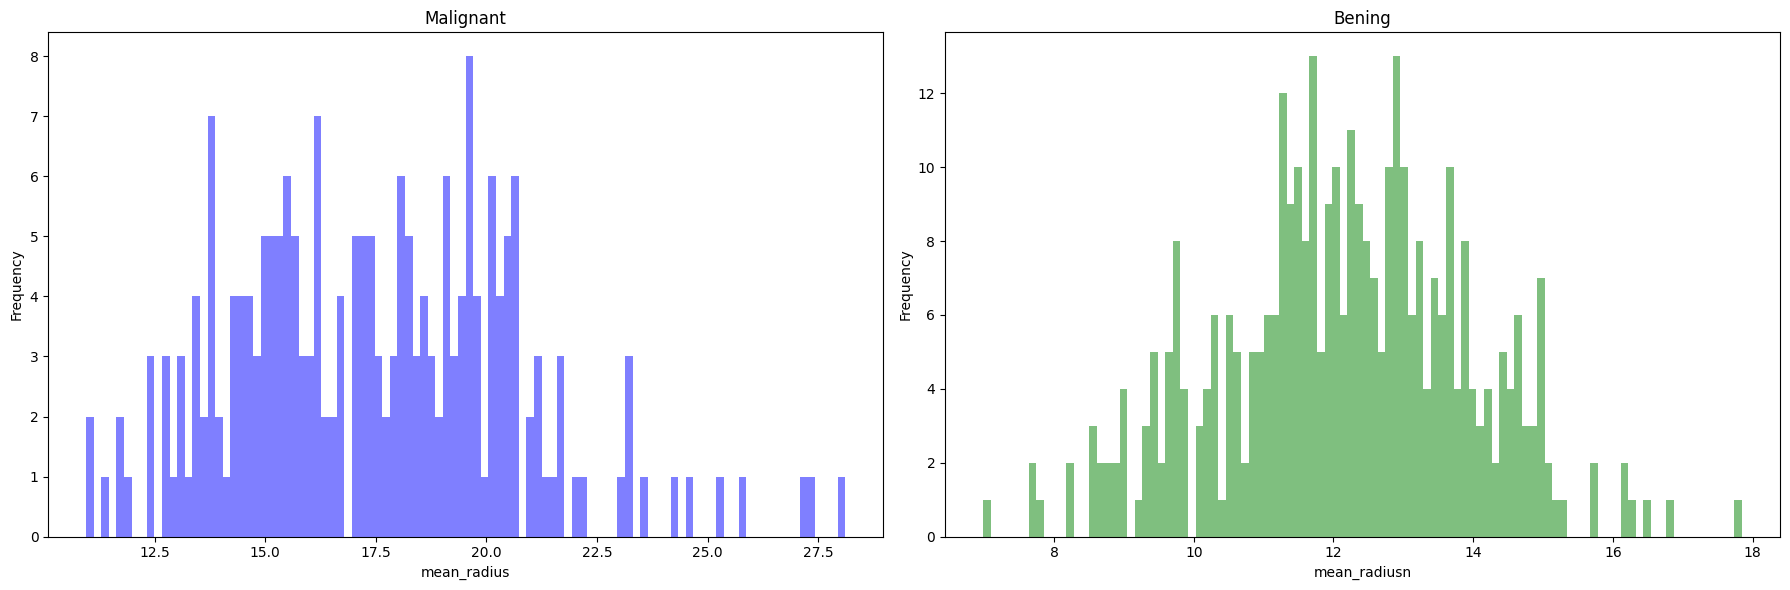

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
# subplot (left)
axes[0].hist(df["mean_radius"][df.diagnosis==1], bins=100, alpha=0.5, color="blue")
axes[0].set_title('Malignant')
axes[0].set_xlabel('mean_radius')
axes[0].set_ylabel('Frequency')

# subplot (right)
axes[1].hist(df["mean_radius"][df.diagnosis==0], bins=100, alpha=0.5, color="green")
axes[1].set_title('Bening')
axes[1].set_xlabel('mean_radiusn')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

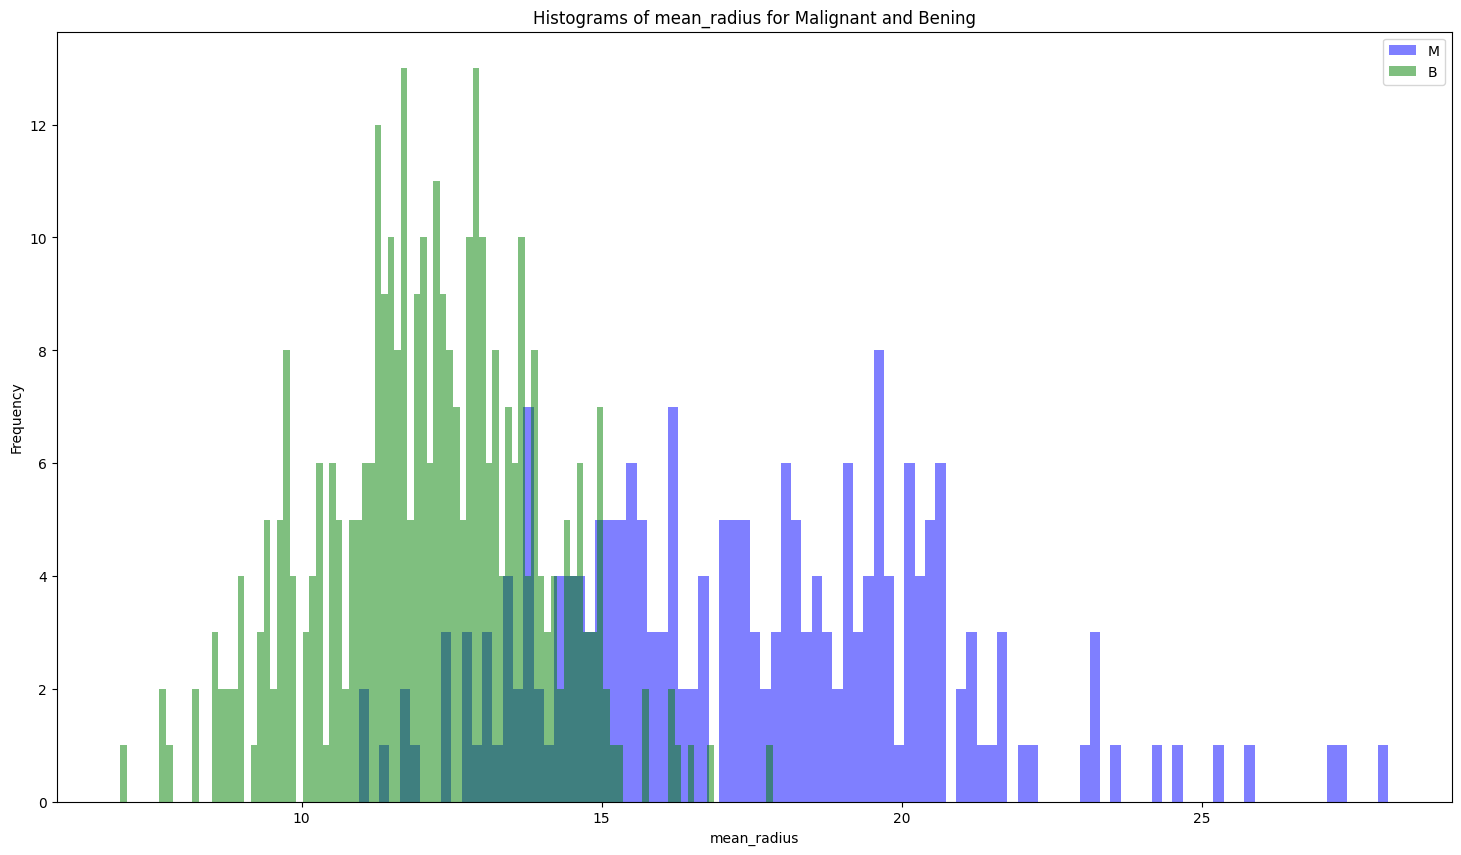

In [36]:
plt.figure(figsize=(18,10))

# Histogramları üst üste bindirerek göster
plt.hist(df["mean_radius"][df.diagnosis==1], bins=100, alpha=0.5, color="blue", label="M")
plt.hist(df["mean_radius"][df.diagnosis==0], bins=100, alpha=0.5, color="green", label="B")

# Görsel ayarlar
plt.title('Histograms of mean_radius for Malignant and Bening')
plt.xlabel('mean_radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()

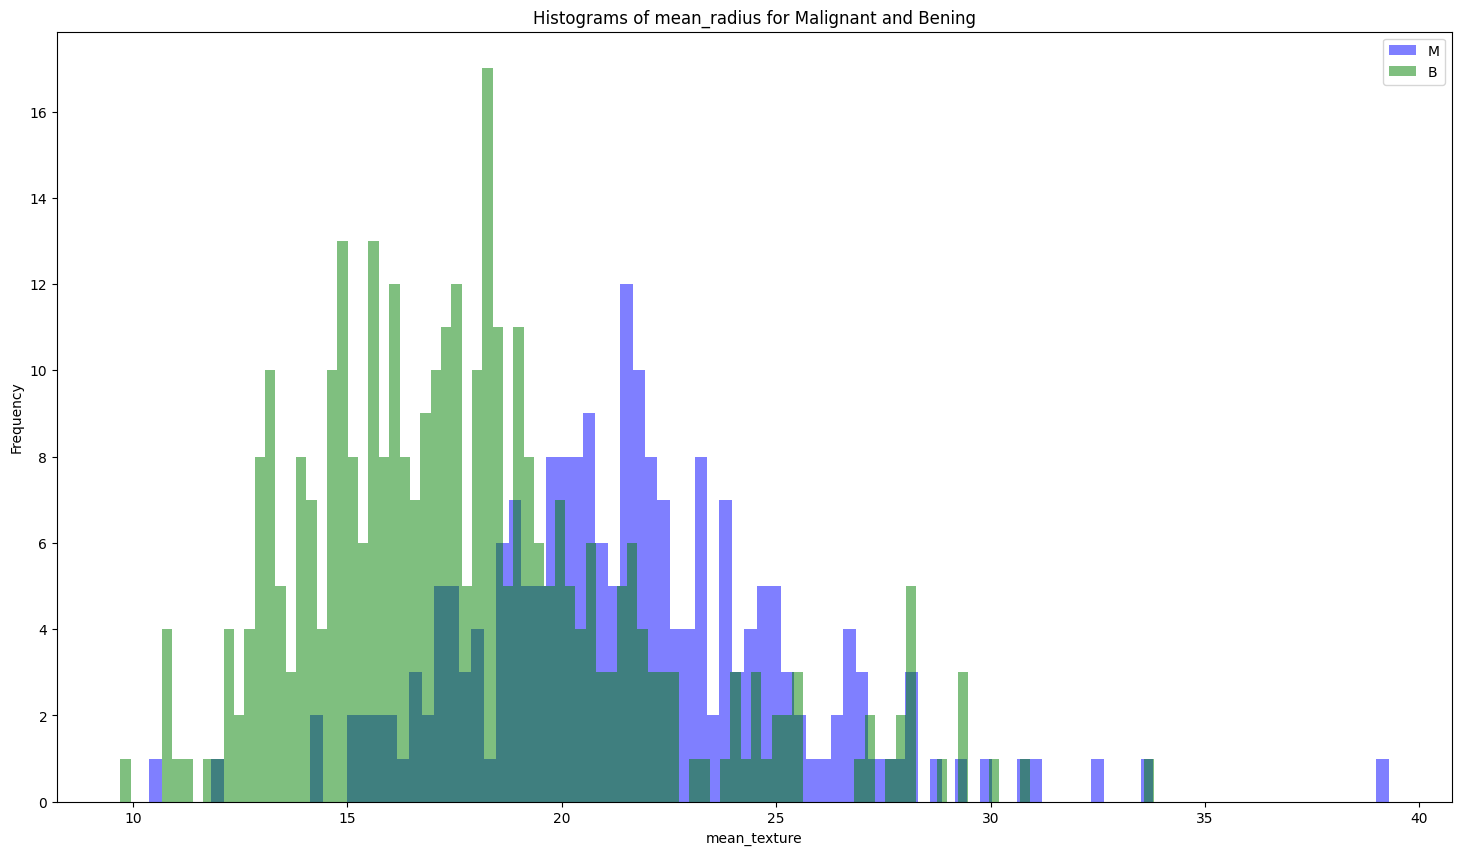

In [37]:
plt.figure(figsize=(18,10))

# Histogramları üst üste bindirerek göster
plt.hist(df["mean_texture"][df.diagnosis==1], bins=100, alpha=0.5, color="blue", label="M")
plt.hist(df["mean_texture"][df.diagnosis==0], bins=100, alpha=0.5, color="green", label="B")

# Görsel ayarlar
plt.title('Histograms of mean_radius for Malignant and Bening')
plt.xlabel('mean_texture')
plt.ylabel('Frequency')
plt.legend()
plt.show()

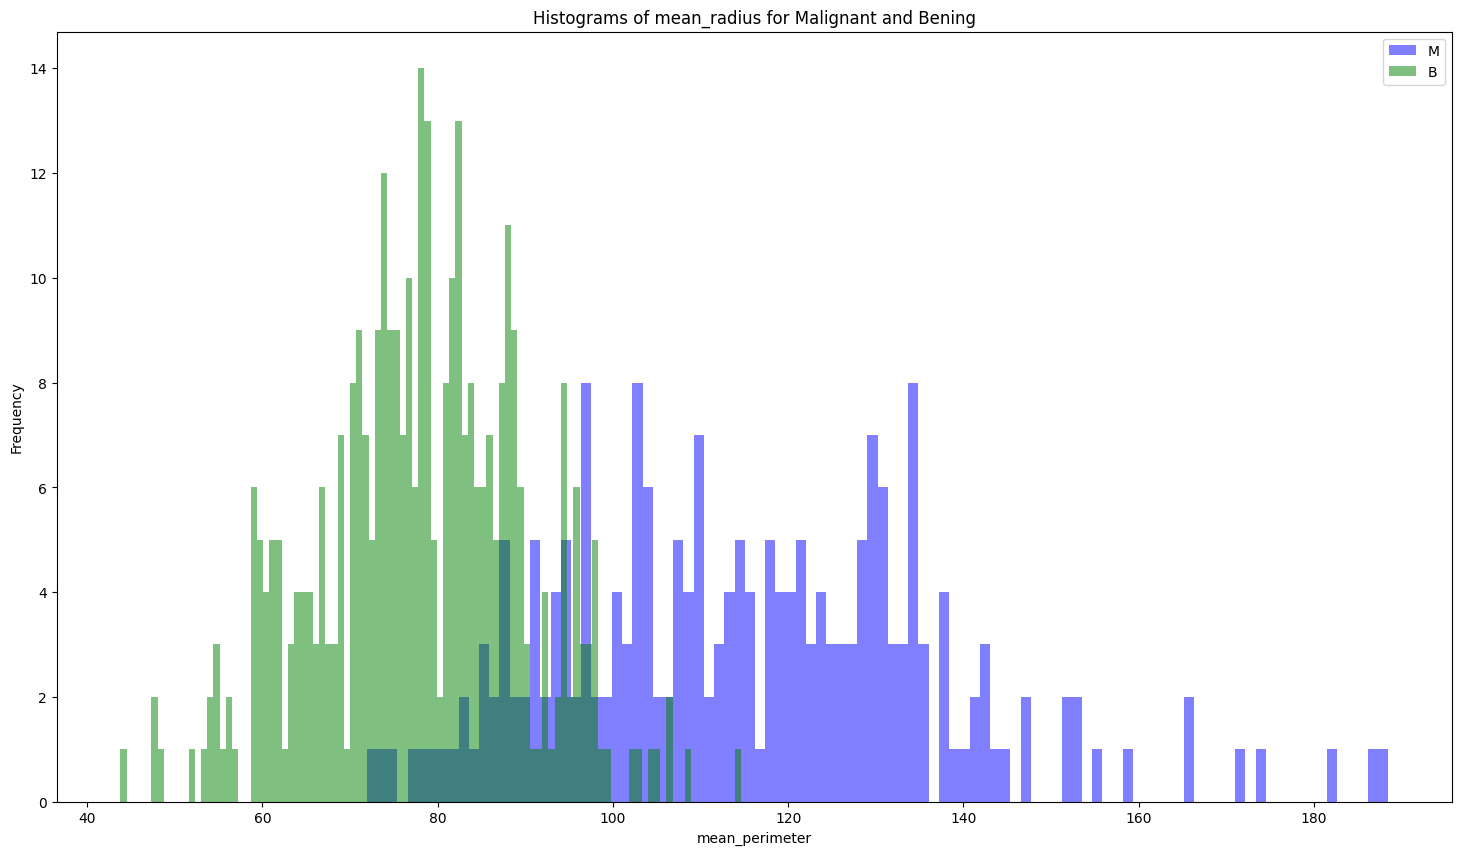

In [38]:
plt.figure(figsize=(18,10))

# Histogramları üst üste bindirerek göster
plt.hist(df["mean_perimeter"][df.diagnosis==1], bins=100, alpha=0.5, color="blue", label="M")
plt.hist(df["mean_perimeter"][df.diagnosis==0], bins=100, alpha=0.5, color="green", label="B")

# Görsel ayarlar
plt.title('Histograms of mean_radius for Malignant and Bening')
plt.xlabel('mean_perimeter')
plt.ylabel('Frequency')
plt.legend()
plt.show()

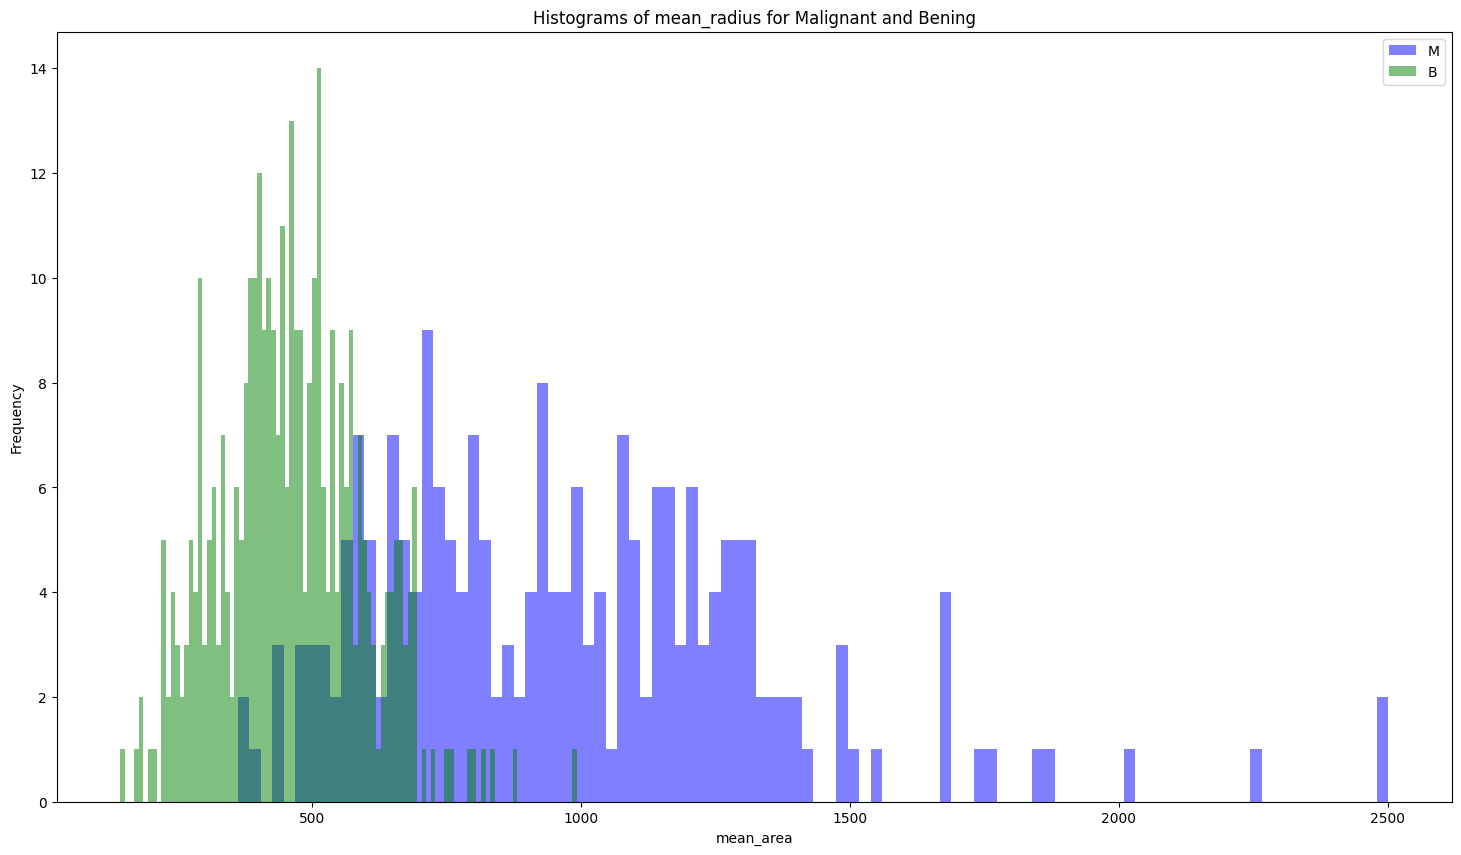

In [39]:
plt.figure(figsize=(18,10))

# Histogramları üst üste bindirerek göster
plt.hist(df["mean_area"][df.diagnosis==1], bins=100, alpha=0.5, color="blue", label="M")
plt.hist(df["mean_area"][df.diagnosis==0], bins=100, alpha=0.5, color="green", label="B")

# Görsel ayarlar
plt.title('Histograms of mean_radius for Malignant and Bening')
plt.xlabel('mean_area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Plotları incelediğimizde bazı sütunların maksimum minimum değerlerinin 2 sınıfa göre ayrıştığını görmekteyiz. 11 sütunun maksimum ve minimum değerleri normal ve kanserli hücreler için farklılık göstermektedir. Bu sütunlar şunlardır:**  

***['mean_radius',  'mean_perimeter', 'mean_area',  'concave points_mean', 'radius_se',  'perimeter_se', 'area_se', 'radius_worst',   'perimeter_worst',  'area_worst',  'concave points_worst']***

In [41]:
# get the correlation of the columns
df.iloc[:,0:12].corr()

mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius                1.000000      0.323782        0.997855   0.987357   
mean_texture               0.323782      1.000000        0.329533   0.321086   
mean_perimeter             0.997855      0.329533        1.000000   0.986507   
mean_area                  0.987357      0.321086        0.986507   1.000000   
mean_smoothness            0.170581     -0.023389        0.207278   0.177028   
mean_compactness           0.506124      0.236702        0.556936   0.498502   
mean_concavity             0.676764      0.302418        0.716136   0.685983   
mean_concave_points        0.822529      0.293464        0.850977   0.823269   
mean_symmetry              0.147741      0.071401        0.183027   0.151293   
mean_fractal_dimension    -0.311631     -0.076437       -0.261477  -0.283110   
radius_error               0.679090      0.275869        0.691765   0.732562   
texture_error             -0.097317      0.386358       -0.086761  -0.066280   

                        mean_smoothness  mean_compactness  mean_concavity  \
mean_radius                    0.170581          0.506124        0.676764   
mean_texture                  -0.023389          0.236702        0.302418   
mean_perimeter                 0.207278          0.556936        0.716136   
mean_area                      0.177028          0.498502        0.685983   
mean_smoothness                1.000000          0.659123        0.521984   
mean_compactness               0.659123          1.000000        0.883121   
mean_concavity                 0.521984          0.883121        1.000000   
mean_concave_points            0.553695          0.831135        0.921391   
mean_symmetry                  0.557775          0.602641        0.500667   
mean_fractal_dimension         0.584792          0.565369        0.336783   
radius_error                   0.301467          0.497473        0.631925   
texture_error                  0.068406          0.046205        0.076218   

                        mean_concave_points  mean_symmetry  \
mean_radius                        0.822529       0.147741   
mean_texture                       0.293464       0.071401   
mean_perimeter                     0.850977       0.183027   
mean_area                          0.823269       0.151293   
mean_smoothness                    0.553695       0.557775   
mean_compactness                   0.831135       0.602641   
mean_concavity                     0.921391       0.500667   
mean_concave_points                1.000000       0.462497   
mean_symmetry                      0.462497       1.000000   
mean_fractal_dimension             0.166917       0.479921   
radius_error                       0.698050       0.303379   
texture_error                      0.021480       0.128053   

                        mean_fractal_dimension  radius_error  texture_error  
mean_radius                          -0.311631      0.679090      -0.097317  
mean_texture                         -0.076437      0.275869       0.386358  
mean_perimeter                       -0.261477      0.691765      -0.086761  
mean_area                            -0.283110      0.732562      -0.066280  
mean_smoothness                       0.584792      0.301467       0.068406  
mean_compactness                      0.565369      0.497473       0.046205  
mean_concavity                        0.336783      0.631925       0.076218  
mean_concave_points                   0.166917      0.698050       0.021480  
mean_symmetry                         0.479921      0.303379       0.128053  
mean_fractal_dimension                1.000000      0.000111       0.164174  
radius_error                          0.000111      1.000000       0.213247  
texture_error                         0.164174      0.213247       1.000000

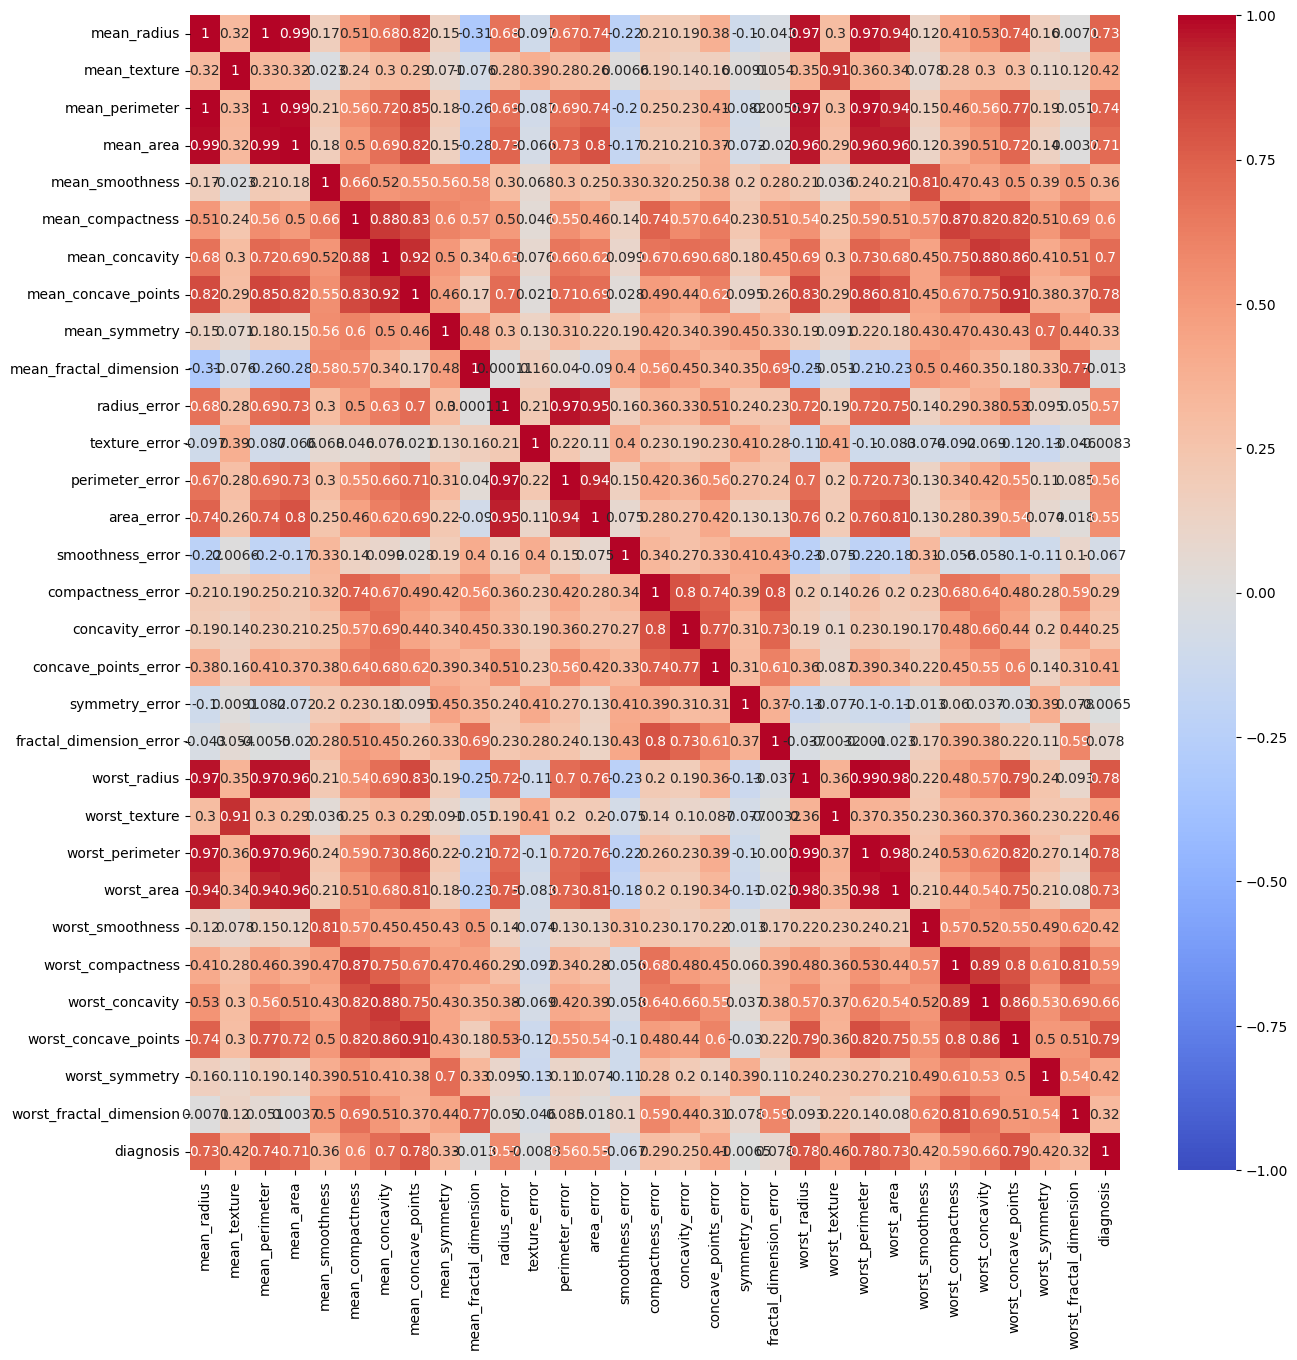

In [42]:
# Multicolinerity var mı diye bakıyoruz
plt.figure(figsize=(15, 15))  
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm') 
plt.show()

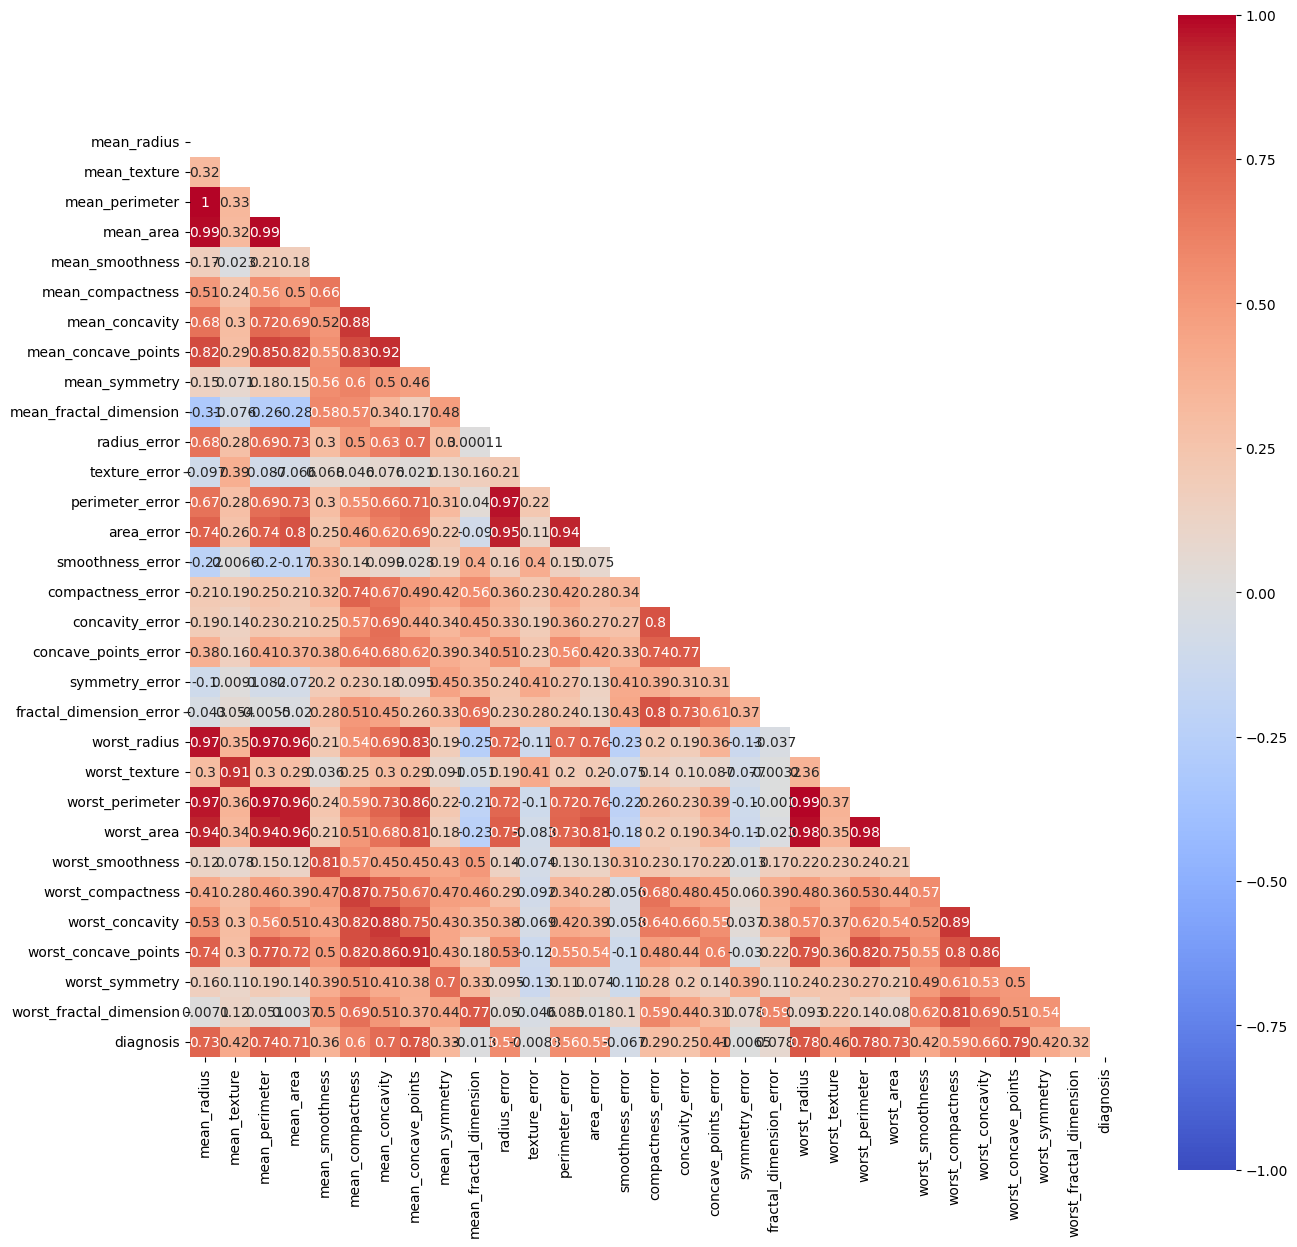

In [43]:
# Korelasyon matrisini çizdiriyoruz
corr = df.corr()  
 
mask = np.triu(np.ones_like(corr, dtype=bool))  

# Set up the matplotlib figure  
plt.figure(figsize=(15, 15))  

# Draw the heatmap with the mask  
sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, cmap='coolwarm', square=True)  

# Show the plot  
plt.show()

In [44]:
# Aralarında yüksek korelasyon olan değişkenleri bulmak icin fonksiyonumuzu yazdık. 
def correlation(dataset, threshold):  
    col_corr = set()  # Set of all the names of correlated columns  
    corr_matrix = dataset.corr()  
    for i in range(len(corr_matrix.columns)):  
        for j in range(i):  
            if abs(corr_matrix.iloc[i, j]) > threshold:  
                colname = corr_matrix.columns[i]  # getting the name of column  
                col_corr.add(colname)  
    return col_corr      

In [45]:
correlatd_col = correlation(df, 0.8)  # Setting threshold as 0.8  
print('Features showing multicollinearity : ', correlatd_col)  

Features showing multicollinearity :  {'worst_texture', 'worst_fractal_dimension', 'mean_concave_points', 'worst_compactness', 'mean_perimeter', 'worst_radius', 'fractal_dimension_error', 'mean_area', 'area_error', 'worst_concave_points', 'perimeter_error', 'worst_smoothness', 'worst_area', 'worst_perimeter', 'concavity_error', 'mean_concavity', 'worst_concavity'}


In [46]:
# Varyans hesaplama  
variances = df.var()  

# En yüksek varyansa sahip sütunu bulma  
highest_variance_column = variances.idxmax()  
highest_variance_value = variances.max()  

print(f"En yüksek varyansa sahip sütun: {highest_variance_column} (Varyans: {highest_variance_value})")  

En yüksek varyansa sahip sütun: worst_area (Varyans: 324167.3851021686)


In [47]:
cor_target = abs(df.corr()["diagnosis"])
relevant_features = cor_target[cor_target>0.6].sort_values(ascending=False)
relevant_features

diagnosis               1.000000
worst_concave_points    0.793566
worst_perimeter         0.782914
mean_concave_points     0.776614
worst_radius            0.776454
mean_perimeter          0.742636
worst_area              0.733825
mean_radius             0.730029
mean_area               0.708984
mean_concavity          0.696360
worst_concavity         0.659610
Name: diagnosis, dtype: float64

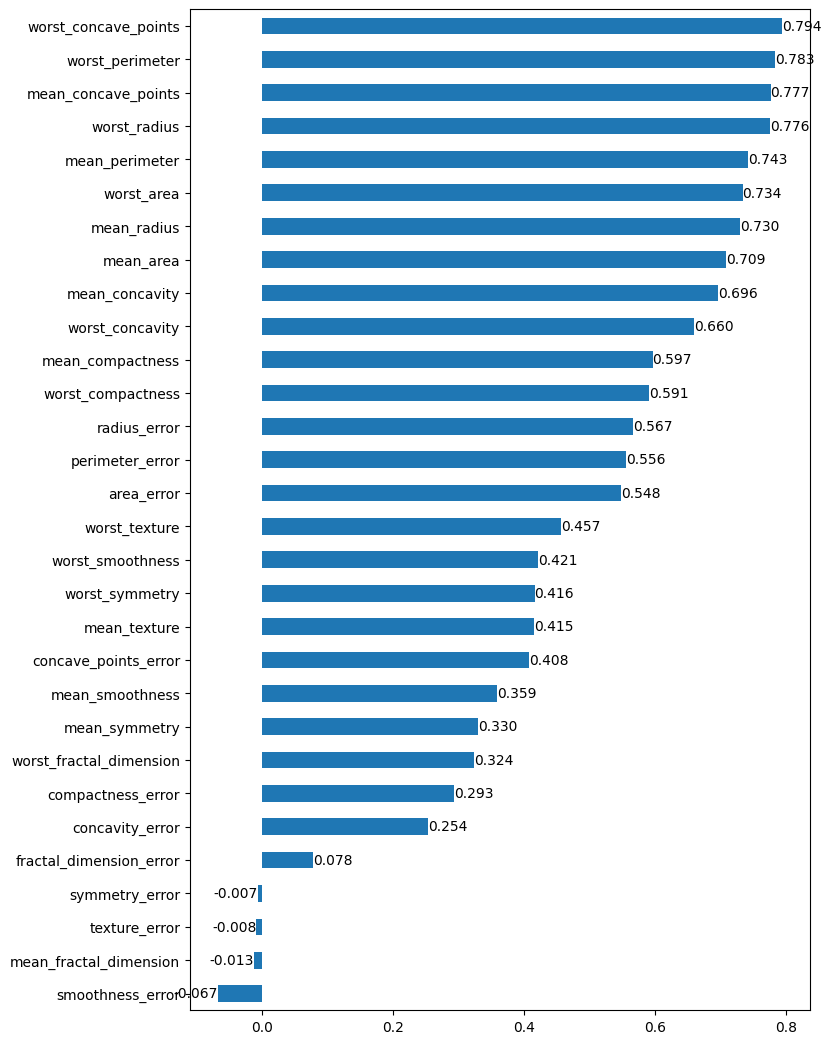

In [48]:
#En yuksek korelasyona sahip sutunları bar grafigi ile gosteriyoruz
plt.figure(figsize=(8,13))  
ax = df.corr()['diagnosis'].sort_values().drop("diagnosis").plot(kind="barh");
ax.bar_label(ax.containers[0], fmt='%.3f', label_type='edge'); 

In [49]:
#Datamızın kopisini alıyoruz
data = df.copy()

# Checking Feature Importance
 ## Yukarıda bizim pairplotlarlarda onemli olarak gordugumuz sutunları bir de random forest modelinin feature importance ozelligi ile inceleyelim

In [51]:
# Data setimizi X ve y olarak ayırıyoruz
X = data.drop('diagnosis', axis=1)  
y = data['diagnosis'] 

# Boldugumuz veri setini train ve test olarak ayırıyoruz 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.175, stratify=y, random_state=5) 

# Standart scaler kullanarak veri setimizi ölçeklendiriyoruz
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier  
ranForest = RandomForestClassifier(random_state=5)  
 
ranForest.fit(X_train, y_train)  

# Özellik önemlerini alma  
importances = ranForest.feature_importances_  

# Özellikleri ve önem derecelerini birleştirme  
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})  

# Önem sıralamasına göre sıralama  
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  

# Önem derecelerini görüntüleme  
print(feature_importance_df)  

                    Feature  Importance
22          worst_perimeter    0.185708
27     worst_concave_points    0.146237
7       mean_concave_points    0.124176
20             worst_radius    0.101401
23               worst_area    0.089893
2            mean_perimeter    0.059382
6            mean_concavity    0.049240
13               area_error    0.033738
26          worst_concavity    0.031917
3                 mean_area    0.029254
10             radius_error    0.019108
0               mean_radius    0.014852
12          perimeter_error    0.012828
21            worst_texture    0.011674
28           worst_symmetry    0.011171
1              mean_texture    0.010859
25        worst_compactness    0.009567
24         worst_smoothness    0.007190
29  worst_fractal_dimension    0.006537
4           mean_smoothness    0.006043
19  fractal_dimension_error    0.005754
16          concavity_error    0.005674
17     concave_points_error    0.004341
8             mean_symmetry    0.004086


# Descriptive Statistics
 ## Diagnosis sutunundaki degerlerin ortalamasını alarak hangi tur icin hangi sutunun daha onemli oldugunu bakıyoruz

In [54]:
# Diagnosis sutunundaki degerlerin ortalamasını alarak hangi tur icin hangi sutunun daha onemli oldugunu bakıyoruz
df.groupby('diagnosis').mean().T   

diagnosis                         0            1
mean_radius               12.146524    17.462830
mean_texture              17.914762    21.604906
mean_perimeter            78.075406   115.365377
mean_area                462.790196   978.376415
mean_smoothness            0.092478     0.102898
mean_compactness           0.080085     0.145188
mean_concavity             0.046058     0.160775
mean_concave_points        0.025717     0.087990
mean_symmetry              0.174186     0.192909
mean_fractal_dimension     0.062867     0.062680
radius_error               0.284082     0.609083
texture_error              1.220380     1.210915
perimeter_error            2.000321     4.323929
area_error                21.135148    72.672406
smoothness_error           0.007196     0.006780
compactness_error          0.021438     0.032281
concavity_error            0.025997     0.041824
concave_points_error       0.009858     0.015060
symmetry_error             0.020584     0.020472
fractal_dimension_error    0.003636     0.004062
worst_radius              13.379801    21.134811
worst_texture             23.515070    29.318208
worst_perimeter           87.005938   141.370330
worst_area               558.899440  1422.286321
worst_smoothness           0.124959     0.144845
worst_compactness          0.182673     0.374824
worst_concavity            0.166238     0.450606
worst_concave_points       0.074444     0.182237
worst_symmetry             0.270246     0.323468
worst_fractal_dimension    0.079442     0.091530

In [55]:
df.groupby('diagnosis').mean().T

diagnosis                         0            1
mean_radius               12.146524    17.462830
mean_texture              17.914762    21.604906
mean_perimeter            78.075406   115.365377
mean_area                462.790196   978.376415
mean_smoothness            0.092478     0.102898
mean_compactness           0.080085     0.145188
mean_concavity             0.046058     0.160775
mean_concave_points        0.025717     0.087990
mean_symmetry              0.174186     0.192909
mean_fractal_dimension     0.062867     0.062680
radius_error               0.284082     0.609083
texture_error              1.220380     1.210915
perimeter_error            2.000321     4.323929
area_error                21.135148    72.672406
smoothness_error           0.007196     0.006780
compactness_error          0.021438     0.032281
concavity_error            0.025997     0.041824
concave_points_error       0.009858     0.015060
symmetry_error             0.020584     0.020472
fractal_dimension_error    0.003636     0.004062
worst_radius              13.379801    21.134811
worst_texture             23.515070    29.318208
worst_perimeter           87.005938   141.370330
worst_area               558.899440  1422.286321
worst_smoothness           0.124959     0.144845
worst_compactness          0.182673     0.374824
worst_concavity            0.166238     0.450606
worst_concave_points       0.074444     0.182237
worst_symmetry             0.270246     0.323468
worst_fractal_dimension    0.079442     0.091530

In [56]:
# Burada'Malignant' (kötü huylu) degerler için ortalama değerlerinin 'Benign' (iyi huylu) için ortalama değerlerdenden 
#büyük olduğu sutunlara bakıyoruz

df.groupby('diagnosis').mean().T[df.groupby('diagnosis').mean().T[1] > df.groupby('diagnosis').mean().T[0]]

diagnosis                         0            1
mean_radius               12.146524    17.462830
mean_texture              17.914762    21.604906
mean_perimeter            78.075406   115.365377
mean_area                462.790196   978.376415
mean_smoothness            0.092478     0.102898
mean_compactness           0.080085     0.145188
mean_concavity             0.046058     0.160775
mean_concave_points        0.025717     0.087990
mean_symmetry              0.174186     0.192909
radius_error               0.284082     0.609083
perimeter_error            2.000321     4.323929
area_error                21.135148    72.672406
compactness_error          0.021438     0.032281
concavity_error            0.025997     0.041824
concave_points_error       0.009858     0.015060
fractal_dimension_error    0.003636     0.004062
worst_radius              13.379801    21.134811
worst_texture             23.515070    29.318208
worst_perimeter           87.005938   141.370330
worst_area               558.899440  1422.286321
worst_smoothness           0.124959     0.144845
worst_compactness          0.182673     0.374824
worst_concavity            0.166238     0.450606
worst_concave_points       0.074444     0.182237
worst_symmetry             0.270246     0.323468
worst_fractal_dimension    0.079442     0.091530

In [57]:
# 'Malignant' (kötü huylu) değerlerin ortalama değerlerinin, 'Benign' (iyi huylu) için 
# ortalama değerlerden büyük olduğu sütunları bulup, liste olarak alıyoruz.
columns = df.groupby('diagnosis').mean().T  
M_bigger_than_B_columns = columns[columns[1] > columns[0]].index.tolist()


['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'radius_error',
 'perimeter_error',
 'area_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [58]:
#Bu sekilde 26 tane sutun oldugunu gorduk
len(M_bigger_than_B_columns)

26

In [59]:
#Toplam sutun sayısı
len(df.columns)

31

In [60]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

In [61]:
# Aradaki sartı saglamayan 5 sutunu yazdırdık.

false_columns = df.columns[~df.columns.isin(M_bigger_than_B_columns)]
false_columns

Index(['mean_fractal_dimension', 'texture_error', 'smoothness_error',
       'symmetry_error', 'diagnosis'],
      dtype='object')

In [62]:
# Burada'Malignant' (kötü huylu) degerler için maximum değerlerinin 'Benign' (iyi huylu) için maximum değerlerinden 
#büyük olduğu sutunlara bakıyoruz
df.groupby('diagnosis').max().T[df.groupby('diagnosis').max().T[1] > df.groupby('diagnosis').max().T[0]]

diagnosis                         0           1
mean_radius                17.85000    28.11000
mean_texture               33.81000    39.28000
mean_perimeter            114.60000   188.50000
mean_area                 992.10000  2501.00000
mean_compactness            0.22390     0.34540
mean_concavity              0.41080     0.42680
mean_concave_points         0.08534     0.20120
mean_symmetry               0.27430     0.30400
mean_fractal_dimension      0.09575     0.09744
radius_error                0.88110     2.87300
perimeter_error             5.11800    21.98000
area_error                 77.11000   542.20000
smoothness_error            0.02177     0.03113
compactness_error           0.10640     0.13540
symmetry_error              0.06146     0.07895
worst_radius               19.82000    36.04000
worst_texture              41.78000    49.54000
worst_perimeter           127.10000   251.20000
worst_area               1210.00000  4254.00000
worst_smoothness            0.20060     0.22260
worst_compactness           0.58490     1.05800
worst_concave_points        0.17500     0.29100
worst_symmetry              0.42280     0.66380
worst_fractal_dimension     0.14860     0.20750

In [63]:
# 'Malignant' (kötü huylu) değerlerin maximum değerlerinin, 'Benign' (iyi huylu) için 
# maximum değerlerinden büyük olduğu sütunları bulup, liste olarak alıyoruz.
columns_max = df.groupby('diagnosis').max().T  
M_max_bigger_than_B_Max_columns = columns_max[columns_max[1] > columns_max[0]].index.tolist()
M_max_bigger_than_B_Max_columns

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'symmetry_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [64]:
# Bu sarta uymayan 7 sutun oldugunu gorduk.

false_columns = df.columns[~df.columns.isin(M_max_bigger_than_B_Max_columns)]
false_columns

Index(['mean_smoothness', 'texture_error', 'concavity_error',
       'concave_points_error', 'fractal_dimension_error', 'worst_concavity',
       'diagnosis'],
      dtype='object')

In [65]:
#Toplam 24 sutun bu sartı saglıyormus
len(M_max_bigger_than_B_Max_columns)

24

# Normal ve kanserli hücre istatistiklerine ayrı ayrı bakılması:

In [67]:
cprint('Descriptive statistics according to the "diagnosis==0, Bening"',"green", attrs=["bold"])
df[df['diagnosis'] == 0].describe().T.style.background_gradient(subset = ['mean','std', 'min','25%','50%','75%', 'max'], cmap = 'viridis')

Descriptive statistics according to the "diagnosis==0, Bening"


In [68]:
cprint('Descriptive statistics according to the "diagnosis==1, Malignant"',"green", attrs=["bold"])
df[df['diagnosis'] == 1].describe().T.style.background_gradient(subset = ['mean','std', 'min','25%','50%','75%', 'max'], cmap = 'viridis')

Descriptive statistics according to the "diagnosis==1, Malignant"


In [69]:
#Ikısıne tek bir tablo olarak bakıyoruz

df_B = df[df["diagnosis"]==0].describe().T
df_M = df[df["diagnosis"]==1].describe().T

df_d = pd.concat([df_B[['mean', 'std', 'min', 'max']].add_suffix('_B'), 
                  df_M[['mean', 'std', 'min', 'max']].add_suffix('_M')], axis=1)
df_d = df_d.reindex(sorted(df_d.columns), axis=1)

cprint('SEPERATED DESCRIBE()s OF DATAFRAME ACCORDING TO CLASSES',"green", attrs=["bold"])
df_d.style.background_gradient(subset = 
          ['max_B','max_M', 'min_B','min_M','mean_B', 'mean_M', 'std_B', 'std_M'], cmap = 'viridis')  # cmap = 'RdPu'

SEPERATED DESCRIBE()s OF DATAFRAME ACCORDING TO CLASSES


Önemli gözlemler:

1. **Boyut farkı**: Kötü huylu (M) tümörler genellikle iyi huylu (B) tümörlerden daha büyüktür. Bu, **mean_radius, mean_perimeter ve mean_area** değerlerinde açıkça görülmektedir.

2. **Doku farklılıkları**: Kötü huylu tümörler ortalamada daha yüksek doku değerlerine sahiptir (mean_texture).

3. **Şekil düzensizlikleri**: Kötü huylu tümörler daha yüksek **compactness, concavity ve concave points** değerlerine sahiptir. Bu, kötü huylu tümörlerin şeklinin daha düzensiz olduğunu gösterir.

4. **Simetri**: Kötü huylu tümörler ortalamada biraz daha az simetriktir, ancak fark çok büyük değildir.

5. **Varyasyon**: Kötü huylu tümörler genellikle daha yüksek standart sapma değerlerine sahiptir. Bu, kötü huylu tümörlerin özelliklerinin daha geniş bir aralıkta değiştiğini gösterir.

6. **Minimum değerler**: Bazı özelliklerde **(örneğin, mean_concavity ve mean_concave_points)**, iyi huylu tümörlerin minimum değeri 0'dır, ancak kötü huylu tümörlerde her zaman bir miktar **concavity ve concave points** vardır.

7. **Fractal dimension**: Bu özellik, iyi huylu ve kötü huylu tümörler arasında çok az fark göstermektedir.

Bu analize dayanarak, tümör boyutu, şekil düzensizliği ve doku özellikleri, iyi huylu ve kötü huylu tümörleri ayırt etmede en belirleyici faktörler gibi görünmektedir.


In [71]:
#Bu ifade, df_M dataframe indeki "max" sütunundaki
# her bir değerin, df_B dataframe indeki aynı satırdaki "max" sütunu değeriyle karşılaştırılmasını sağlar. 
(df_M["max"] > df_B["max"])


mean_radius                 True
mean_texture                True
mean_perimeter              True
mean_area                   True
mean_smoothness            False
mean_compactness            True
mean_concavity              True
mean_concave_points         True
mean_symmetry               True
mean_fractal_dimension      True
radius_error                True
texture_error              False
perimeter_error             True
area_error                  True
smoothness_error            True
compactness_error           True
concavity_error            False
concave_points_error       False
symmetry_error              True
fractal_dimension_error    False
worst_radius                True
worst_texture               True
worst_perimeter             True
worst_area                  True
worst_smoothness            True
worst_compactness           True
worst_concavity            False
worst_concave_points        True
worst_symmetry              True
worst_fractal_dimension     True
diagnosis 

In [72]:
# Bu sartı saglamayan 6 sutunları yazdırdık
['smoothness_mean', 'texture_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'concavity_worst']

['smoothness_mean',
 'texture_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'concavity_worst']

In [73]:
#Sartımızı saglayan sutunları yazdırdık
result = df_M["max"] > df_B["max"]
true_columns = result[result].index.tolist()

print(true_columns)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'symmetry_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension', 'diagnosis']


## Identifying distinct columns for max-min values

In [75]:
# OR OPERAND FOR MAXs/MINs

max_or_min_cond_valid_for_all_col = ((df_M["max"] > df_B["max"]) | (df_B["min"] < df_M["min"]))
max_or_min_cond_valid_for_all_col.value_counts()

True    31
Name: count, dtype: int64

In [76]:
max_or_min_cond_valid_for_all_col

mean_radius                True
mean_texture               True
mean_perimeter             True
mean_area                  True
mean_smoothness            True
mean_compactness           True
mean_concavity             True
mean_concave_points        True
mean_symmetry              True
mean_fractal_dimension     True
radius_error               True
texture_error              True
perimeter_error            True
area_error                 True
smoothness_error           True
compactness_error          True
concavity_error            True
concave_points_error       True
symmetry_error             True
fractal_dimension_error    True
worst_radius               True
worst_texture              True
worst_perimeter            True
worst_area                 True
worst_smoothness           True
worst_compactness          True
worst_concavity            True
worst_concave_points       True
worst_symmetry             True
worst_fractal_dimension    True
diagnosis                  True
dtype: b

In [77]:
# AND OPERAND FOR MAXs/MINs

max_and_min_cond_valid_for_col = ((df_M["max"] > df_B["max"]) & (df_B["min"] < df_M["min"]))
max_and_min_cond_valid_for_col.value_counts()

True     21
False    10
Name: count, dtype: int64

In [78]:
max_and_min_cond_valid_for_col

mean_radius                 True
mean_texture                True
mean_perimeter              True
mean_area                   True
mean_smoothness            False
mean_compactness            True
mean_concavity              True
mean_concave_points         True
mean_symmetry               True
mean_fractal_dimension     False
radius_error                True
texture_error              False
perimeter_error             True
area_error                  True
smoothness_error            True
compactness_error           True
concavity_error            False
concave_points_error       False
symmetry_error             False
fractal_dimension_error    False
worst_radius                True
worst_texture               True
worst_perimeter             True
worst_area                  True
worst_smoothness            True
worst_compactness           True
worst_concavity            False
worst_concave_points        True
worst_symmetry             False
worst_fractal_dimension    False
diagnosis 

In [79]:
cols_meet_the_cond = sum(
    (df[(df["diagnosis"] == 1)][col].max() > df[(df["diagnosis"] == 0)][col].max()) and
    (df[(df["diagnosis"] == 0)][col].min() < df[(df["diagnosis"] == 1)][col].min())
    for col in df.columns if col != "diagnosis")
cols_meet_the_cond

20

In [80]:
cols_meet_the_cond = [  
    col for col in df.columns if col != "diagnosis" and (  
        (df[df["diagnosis"] == 1][col].max() > df[df["diagnosis"] == 0][col].max()) and  
        (df[df["diagnosis"] == 0][col].min() < df[df["diagnosis"] == 1][col].min())  
    )  
]  

cols_meet_the_cond

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'radius_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concave_points']

## ***We identified 20 columns where the condition below met.***

```python
(df[(df["diagnosis"] == 1)][col].max() > df[(df["diagnosis"] == 0)][col].max()) and
(df[(df["diagnosis"] == 0)][col].min() < df[(df["diagnosis"] == 1)][col].min())
```

In [83]:
selected_cols = ['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'radius_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concave_points']

In [84]:
df[df["diagnosis"]==1][selected_cols].describe().T['max']

mean_radius               28.11000
mean_texture              39.28000
mean_perimeter           188.50000
mean_area               2501.00000
mean_compactness           0.34540
mean_concavity             0.42680
mean_concave_points        0.20120
mean_symmetry              0.30400
radius_error               2.87300
perimeter_error           21.98000
area_error               542.20000
smoothness_error           0.03113
compactness_error          0.13540
worst_radius              36.04000
worst_texture             49.54000
worst_perimeter          251.20000
worst_area              4254.00000
worst_smoothness           0.22260
worst_compactness          1.05800
worst_concave_points       0.29100
Name: max, dtype: float64

In [85]:
df[df["diagnosis"]==0][selected_cols].describe().T['max']

mean_radius               17.85000
mean_texture              33.81000
mean_perimeter           114.60000
mean_area                992.10000
mean_compactness           0.22390
mean_concavity             0.41080
mean_concave_points        0.08534
mean_symmetry              0.27430
radius_error               0.88110
perimeter_error            5.11800
area_error                77.11000
smoothness_error           0.02177
compactness_error          0.10640
worst_radius              19.82000
worst_texture             41.78000
worst_perimeter          127.10000
worst_area              1210.00000
worst_smoothness           0.20060
worst_compactness          0.58490
worst_concave_points       0.17500
Name: max, dtype: float64

In [86]:
df[df["diagnosis"]==1][selected_cols].describe().T['min']

mean_radius              10.950000
mean_texture             10.380000
mean_perimeter           71.900000
mean_area               361.600000
mean_compactness          0.046050
mean_concavity            0.023980
mean_concave_points       0.020310
mean_symmetry             0.130800
radius_error              0.193800
perimeter_error           1.334000
area_error               13.990000
smoothness_error          0.002667
compactness_error         0.008422
worst_radius             12.840000
worst_texture            16.670000
worst_perimeter          85.100000
worst_area              508.100000
worst_smoothness          0.088220
worst_compactness         0.051310
worst_concave_points      0.028990
Name: min, dtype: float64

In [87]:
df[df["diagnosis"]==0][selected_cols].describe().T['min']

mean_radius               6.981000
mean_texture              9.710000
mean_perimeter           43.790000
mean_area               143.500000
mean_compactness          0.019380
mean_concavity            0.000000
mean_concave_points       0.000000
mean_symmetry             0.106000
radius_error              0.111500
perimeter_error           0.757000
area_error                6.802000
smoothness_error          0.001713
compactness_error         0.002252
worst_radius              7.930000
worst_texture            12.020000
worst_perimeter          50.410000
worst_area              185.200000
worst_smoothness          0.071170
worst_compactness         0.027290
worst_concave_points      0.000000
Name: min, dtype: float64

## Maks-min değerlerini kullanarak Kötü Huylu ve İyi Huylu satırları ayırt etmek için koşulların oluşturulması.


- **filter1 sartımızı saglayan 173 Malignant degeri bulduk**
- **filter2 sartımızı saglayan 256 Benign degeri bulduk.**
- **`excluded_df(mixed 140 rows);` filter1 ve filter2 sartı ile ayırt edemedigimiz 140 degeri ayrı bir dataframe olarak ayırdık**
- **max-min değerlerinin birbirine karıştığı ve farklı olmadığı excluded_df'de ayırt edilemeyen satırların RF feature importance ozelligini kullanarak tahmin ettirmeye calısacagız .**

In [90]:
selected_cols = ['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'radius_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concave_points']

In [91]:
max_values = df[df["diagnosis"] == 0][selected_cols].describe().T['max'] 
min_values = df[df["diagnosis"] == 1][selected_cols].describe().T['min']

filter1 = (df[selected_cols] > max_values).any(axis=1)
filter2 = (df[selected_cols] < min_values).any(axis=1)

In [92]:
df[(filter1)] 

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
567        20.60         29.33          140.10     1265.0          0.11780   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0             0.27760          0.3001              0.14710         0.2419   
1             0.07864          0.0869              0.07017         0.1812   
2             0.15990          0.1974              0.12790         0.2069   
3             0.28390          0.2414              0.10520         0.2597   
4             0.13280          0.1980              0.10430         0.1809   
..                ...             ...                  ...            ...   
562           0.20870          0.2550              0.09429         0.2128   
563           0.22360          0.3174              0.14740         0.2149   
564           0.11590          0.2439              0.13890         0.1726   
565           0.10340          0.1440              0.09791         0.1752   
567           0.27700          0.3514              0.15200         0.2397   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
562                 0.07152  ...          42.79           128.70       915.0   
563                 0.06879  ...          29.41           179.10      1819.0   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
567                 0.07016  ...          39.42           184.60      1821.0   

     worst_smoothness  worst_compactness  worst_concavity  \
0              0.1622             0.6656           0.7119   
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
3              0.2098             0.8663           0.6869   
4              0.1374             0.2050           0.4000   
..                ...                ...              ...   
562            0.1417             0.7917           1.1700   
563            0.1407             0.4186           0.6599   
564            0.1410             0.2113           0.4107   
565            0.1166             0.1922           0.3215   
567            0.1650             0.8681           0.9387   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [93]:
df[(filter1)].diagnosis.value_counts()

diagnosis
1    173
Name: count, dtype: int64

In [94]:
df[(filter1 | filter2)] 

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0             0.27760          0.3001              0.14710         0.2419   
1             0.07864          0.0869              0.07017         0.1812   
2             0.15990          0.1974              0.12790         0.2069   
3             0.28390          0.2414              0.10520         0.2597   
4             0.13280          0.1980              0.10430         0.1809   
..                ...             ...                  ...            ...   
563           0.22360          0.3174              0.14740         0.2149   
564           0.11590          0.2439              0.13890         0.1726   
565           0.10340          0.1440              0.09791         0.1752   
567           0.27700          0.3514              0.15200         0.2397   
568           0.04362          0.0000              0.00000         0.1587   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
563                 0.06879  ...          29.41           179.10      1819.0   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst_smoothness  worst_compactness  worst_concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
563           0.14070            0.41860           0.6599   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [95]:
df[(filter2)] 

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
37        13.030         18.42           82.61      523.8          0.08983   
46         8.196         16.84           51.71      201.9          0.08600   
50        11.760         21.60           74.72      427.9          0.08637   
..           ...           ...             ...        ...              ...   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
559       11.510         23.93           74.52      403.5          0.09261   
561       11.200         29.37           70.67      386.0          0.07449   
568        7.760         24.54           47.92      181.0          0.05263   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
20            0.12700        0.045680             0.031100         0.1967   
21            0.06492        0.029560             0.020760         0.1815   
37            0.03766        0.025620             0.029230         0.1467   
46            0.05943        0.015880             0.005917         0.1769   
50            0.04966        0.016570             0.011150         0.1495   
..                ...             ...                  ...            ...   
556           0.07504        0.005025             0.011160         0.1791   
557           0.04971        0.000000             0.000000         0.1742   
559           0.10210        0.111200             0.041050         0.1388   
561           0.03558        0.000000             0.000000         0.1060   
568           0.04362        0.000000             0.000000         0.1587   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
20                  0.06811  ...          20.49            96.09       630.5   
21                  0.06905  ...          15.66            65.13       314.9   
37                  0.05863  ...          22.81            84.46       545.9   
46                  0.06503  ...          21.96            57.26       242.2   
50                  0.05888  ...          25.72            82.98       516.5   
..                      ...  ...            ...              ...         ...   
556                 0.06331  ...          22.88            67.88       347.3   
557                 0.06059  ...          34.24            66.50       330.6   
559                 0.06570  ...          37.16            82.28       474.2   
561                 0.05502  ...          38.30            75.19       439.6   
568                 0.05884  ...          30.37            59.16       268.6   

     worst_smoothness  worst_compactness  worst_concavity  \
20            0.13120            0.27760          0.18900   
21            0.13240            0.11480          0.08867   
37            0.09701            0.04619          0.04833   
46            0.12970            0.13570          0.06880   
50            0.10850            0.08615          0.05523   
..                ...                ...              ...   
556           0.12650            0.12000          0.01005   
557           0.10730            0.07158          0.00000   
559           0.12980            0.25170          0.36300   
561           0.09267            0.05494          0.00000   
568           0.08996            0.06444          0.00000   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  diagnosis  
20                0.07283          0.3184                  0.08183          0  
21                0.06227          0.2450                  0.07773          0  
37                0.05013          0.1987                  0.06169          0  
46                0.02564          0.3105                  0.07409          0  
50                0.03715          0.2433        

In [96]:
df[(filter2)].diagnosis.value_counts()

diagnosis
0    256
Name: count, dtype: int64

In [97]:
# Bu iki sart ile ayırt edemedigimiz satırları ayrı bir dataframe e atıyoruz

excluded_df = df[~(filter1 | filter2)] 
excluded_df

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
5          12.45         15.70           82.57      477.1          0.12780   
7          13.71         20.83           90.20      577.9          0.11890   
10         16.02         23.24          102.70      797.8          0.08206   
13         15.85         23.95          103.70      782.7          0.08401   
16         14.68         20.13           94.74      684.5          0.09867   
..           ...           ...             ...        ...              ...   
545        13.62         23.23           87.19      573.2          0.09246   
554        12.88         28.92           82.50      514.3          0.08123   
558        14.59         22.68           96.39      657.1          0.08473   
560        14.05         27.15           91.38      600.4          0.09929   
566        16.60         28.08          108.30      858.1          0.08455   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
5             0.17000         0.15780              0.08089         0.2087   
7             0.16450         0.09366              0.05985         0.2196   
10            0.06669         0.03299              0.03323         0.1528   
13            0.10020         0.09938              0.05364         0.1847   
16            0.07200         0.07395              0.05259         0.1586   
..                ...             ...                  ...            ...   
545           0.06747         0.02974              0.02443         0.1664   
554           0.05824         0.06195              0.02343         0.1566   
558           0.13300         0.10290              0.03736         0.1454   
560           0.11260         0.04462              0.04304         0.1537   
566           0.10230         0.09251              0.05302         0.1590   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
5                   0.07613  ...          23.75           103.40       741.6   
7                   0.07451  ...          28.14           110.60       897.0   
10                  0.05697  ...          33.88           123.80      1150.0   
13                  0.05338  ...          27.66           112.00       876.5   
16                  0.05922  ...          30.88           123.40      1138.0   
..                      ...  ...            ...              ...         ...   
545                 0.05801  ...          29.09            97.58       729.8   
554                 0.05708  ...          35.74            88.84       595.7   
558                 0.06147  ...          27.27           105.90       733.5   
560                 0.06171  ...          33.17           100.20       706.7   
566                 0.05648  ...          34.12           126.70      1124.0   

     worst_smoothness  worst_compactness  worst_concavity  \
5              0.1791             0.5249           0.5355   
7              0.1654             0.3682           0.2678   
10             0.1181             0.1551           0.1459   
13             0.1131             0.1924           0.2322   
16             0.1464             0.1871           0.2914   
..                ...                ...              ...   
545            0.1216             0.1517           0.1049   
554            0.1227             0.1620           0.2439   
558            0.1026             0.3171           0.3662   
560            0.1241             0.2264           0.1326   
566            0.1139             0.3094           0.3403   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  diagnosis  
5                 0.17410          0.3985                  0.12440          1  
7                 0.15560          0.3196                  0.11510          1  
10                0.09975          0.2948                  0.08452          1  
13                0.11190          0.2809                  0.06287          1  
16                0.16090          0.3029        

In [98]:
#Bu dataframe deki degerlerin dagılımına bakıyoruz.
excluded_df.diagnosis.value_counts()

diagnosis
0    101
1     39
Name: count, dtype: int64

In [99]:
#Filter 1 sartımızı saglayan satırları inceliyoruz
filtered_df_max = df[filter1]
filtered_df_max

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
567        20.60         29.33          140.10     1265.0          0.11780   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0             0.27760          0.3001              0.14710         0.2419   
1             0.07864          0.0869              0.07017         0.1812   
2             0.15990          0.1974              0.12790         0.2069   
3             0.28390          0.2414              0.10520         0.2597   
4             0.13280          0.1980              0.10430         0.1809   
..                ...             ...                  ...            ...   
562           0.20870          0.2550              0.09429         0.2128   
563           0.22360          0.3174              0.14740         0.2149   
564           0.11590          0.2439              0.13890         0.1726   
565           0.10340          0.1440              0.09791         0.1752   
567           0.27700          0.3514              0.15200         0.2397   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
562                 0.07152  ...          42.79           128.70       915.0   
563                 0.06879  ...          29.41           179.10      1819.0   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
567                 0.07016  ...          39.42           184.60      1821.0   

     worst_smoothness  worst_compactness  worst_concavity  \
0              0.1622             0.6656           0.7119   
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
3              0.2098             0.8663           0.6869   
4              0.1374             0.2050           0.4000   
..                ...                ...              ...   
562            0.1417             0.7917           1.1700   
563            0.1407             0.4186           0.6599   
564            0.1410             0.2113           0.4107   
565            0.1166             0.1922           0.3215   
567            0.1650             0.8681           0.9387   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [100]:
#Filter 1 sartımızı saglayan satırların toplam 173 tane oldugunu gorduk
filtered_df_max.diagnosis.value_counts()

diagnosis
1    173
Name: count, dtype: int64

In [101]:
#Filter 2 sartımızı saglayan satırları inceliyoruz
filtered_df_min = df[filter2]
filtered_df_min

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
37        13.030         18.42           82.61      523.8          0.08983   
46         8.196         16.84           51.71      201.9          0.08600   
50        11.760         21.60           74.72      427.9          0.08637   
..           ...           ...             ...        ...              ...   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
559       11.510         23.93           74.52      403.5          0.09261   
561       11.200         29.37           70.67      386.0          0.07449   
568        7.760         24.54           47.92      181.0          0.05263   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
20            0.12700        0.045680             0.031100         0.1967   
21            0.06492        0.029560             0.020760         0.1815   
37            0.03766        0.025620             0.029230         0.1467   
46            0.05943        0.015880             0.005917         0.1769   
50            0.04966        0.016570             0.011150         0.1495   
..                ...             ...                  ...            ...   
556           0.07504        0.005025             0.011160         0.1791   
557           0.04971        0.000000             0.000000         0.1742   
559           0.10210        0.111200             0.041050         0.1388   
561           0.03558        0.000000             0.000000         0.1060   
568           0.04362        0.000000             0.000000         0.1587   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
20                  0.06811  ...          20.49            96.09       630.5   
21                  0.06905  ...          15.66            65.13       314.9   
37                  0.05863  ...          22.81            84.46       545.9   
46                  0.06503  ...          21.96            57.26       242.2   
50                  0.05888  ...          25.72            82.98       516.5   
..                      ...  ...            ...              ...         ...   
556                 0.06331  ...          22.88            67.88       347.3   
557                 0.06059  ...          34.24            66.50       330.6   
559                 0.06570  ...          37.16            82.28       474.2   
561                 0.05502  ...          38.30            75.19       439.6   
568                 0.05884  ...          30.37            59.16       268.6   

     worst_smoothness  worst_compactness  worst_concavity  \
20            0.13120            0.27760          0.18900   
21            0.13240            0.11480          0.08867   
37            0.09701            0.04619          0.04833   
46            0.12970            0.13570          0.06880   
50            0.10850            0.08615          0.05523   
..                ...                ...              ...   
556           0.12650            0.12000          0.01005   
557           0.10730            0.07158          0.00000   
559           0.12980            0.25170          0.36300   
561           0.09267            0.05494          0.00000   
568           0.08996            0.06444          0.00000   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  diagnosis  
20                0.07283          0.3184                  0.08183          0  
21                0.06227          0.2450                  0.07773          0  
37                0.05013          0.1987                  0.06169          0  
46                0.02564          0.3105                  0.07409          0  
50                0.03715          0.2433        

In [102]:
#Filter 2 sartımızı saglayan satırların toplam 256 tane oldugunu gorduk
filtered_df_min.diagnosis.value_counts()

diagnosis
0    256
Name: count, dtype: int64

## Max-min değerlerine gore Ayrıştıramadıgımız satırları içeren excluded_df için şimdi feature importance analizi yapacağız.

Herhangi bir filtreleme yapmadan tüm veri çerçevesi üzerinde feature importance uygulayarak, **önemlerine göre belirli sütunları seçtiğimizde ve modelde yalnızca bunları kullandığımızda, tüm sütunlarla eğitime kıyasla benzer puanlar** elde ettiğimizi görüyoruz. 
Bununla birlikte, tüm satırları kullanarak feature importance hesapladığımızda,tum datamızı kullandıgımızda sonuca en etkili sütunları vurgular.Sadece excluded_df'deki ayırt edemedigi satırları kullandığımızda, ***farklı sütunlar önem kazanır.*** Bu şekilde, max-min değerlerinin ayrılmadığı satırlarda hangi sütunların etkili olduğunu tespit edebiliriz. **excluded_df için feature importance sonuçlarında, öne çıkan ancak tüm veri çerçevesi ve korelasyon sonuçları** üzerinde hesaplanan özellik öneminde anlamlı olmayan iki sütun ***(texture_worst, fractal_dimension_worst)*** bulduk; Malign ve Benign arasında ayrım yapmak için önemli olduklarından, bu sütunları da model eğitimine dahil etmeye karar verdik.

Yalnızca excluded_df'deki satırların değerlendirilmesi ile tum data setini incelemek farklı önemli sütunları ortaya çıkararak maks-min değerlerinin belirgin bir şekilde ayrılmadığı durumlarda etkili özellikleri belirlememize olanak tanır. Özellikle, iki sütun excluded_df analizinde anlamlı olarak ortaya çıkmıştır ancak tum dataseti içinde anlamlı değildir, bu da Malign ve Benign vakaları ayırt etmedeki değerlerini göstermektedir. Sonuç olarak, bu sütunları model eğitimine dahil etmeyi seçtik.

**Feature  Importance of excluded_df**

area_worst              0.094499

concave points_mean     0.075641

concave points_worst    0.074458

**texture_worst           0.058688**

radius_worst            0.058665

perimeter_worst         0.057076

concavity_worst         0.049554

**fractal_dimension_worst 0.043906**

concavity_mean          0.042677

area_se                 0.042381

# RandomForest ile excluded_df'in Feature Importance'a bakılması

In [108]:
# RandomForest kullanarak sadece mixed satırlardan 
# (kanserli-normal hücre değerlerinin iç içe geçtiği satırlardan) oluşan dataframe'in Feature Importance'ına bakacağız.
data1 = excluded_df

In [109]:
# Separating features and target variable  
X = data1.drop('diagnosis', axis=1)  
y = data1['diagnosis'] 

# Datamızı train ve test olarak ayırıyoruz 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.175, stratify=y, random_state=5) 

# Standart scaler kullanarak veri setimizi ölçeklendiriyoruz
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier  
ranForest = RandomForestClassifier(random_state=5)  

# Modelimizi eğitiyoruz  
ranForest.fit(X_train, y_train)  

RandomForestClassifier(random_state=5)

In [110]:
# Random forest ın feature importance ozelligini kullanıyoruz  
importances = ranForest.feature_importances_  

# Ozelliklerin ve onem derecelerini birlestirme  
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})  

# Onem sıralamasına gore sıralama
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  

# Bu sonucları yazdırıyoruz 
print(feature_importance_df)

                    Feature  Importance
23               worst_area    0.094499
7       mean_concave_points    0.075641
27     worst_concave_points    0.074458
21            worst_texture    0.058688
20             worst_radius    0.058665
22          worst_perimeter    0.057076
26          worst_concavity    0.049554
29  worst_fractal_dimension    0.043906
6            mean_concavity    0.042677
13               area_error    0.042381
3                 mean_area    0.039400
24         worst_smoothness    0.039200
1              mean_texture    0.035379
2            mean_perimeter    0.031073
15        compactness_error    0.027458
14         smoothness_error    0.023360
10             radius_error    0.023301
5          mean_compactness    0.023047
12          perimeter_error    0.018449
0               mean_radius    0.017998
11            texture_error    0.016088
4           mean_smoothness    0.015657
28           worst_symmetry    0.014479
19  fractal_dimension_error    0.013870


***Model eğitimine dahil etmeye karar verdiğimiz Feature Importance kullanarak excluded_df'de iki ekstra sutun belirledik:***

| **texture_worst    0.058688**  
| **fractal_dimension_worst    0.043906**

# Building and Checking Different Models-1 (tüm dataseti, farklı modellerle denendi)

In [113]:
df.head(2)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   worst_symmetry  worst_fractal_dimension  diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  

[2 rows x 31 columns]

In [321]:
#Split the data set into independent(x) and dependent (y) data sets
# x=df.iloc[:,1:31].values
# y=df.iloc[:,1].values
x = df.drop('diagnosis', axis=1)  
y = df['diagnosis'] 

# from sklearn.preprocessing import LabelEncoder  
# label_encoder = LabelEncoder()  
# y = label_encoder.fit_transform(y)

#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.175,stratify=y,random_state=5)

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

# Create a function for the models  
def models(x_train, y_train):  
    # Logistic Regression Model with max_iter parameter  
    from sklearn.linear_model import LogisticRegression  
    # log = LogisticRegression(random_state=5, solver='saga', max_iter=1000, C=0.1)  
    log = LogisticRegression()  
    log.fit(x_train, y_train)  
    
    # Decision Tree  
    from sklearn.tree import DecisionTreeClassifier  
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)  
    tree.fit(x_train, y_train)  
    
    # Random Forest Classifier  
    from sklearn.ensemble import RandomForestClassifier  
    forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=5)  
    forest.fit(x_train, y_train)  

    # Stochastic Gradient Descent (SGD)
    from sklearn.linear_model import SGDClassifier
    SGD = SGDClassifier(alpha=0.01, penalty= "l2", random_state=5)
    SGD.fit(x_train, y_train)
    
    # Support Vector Machines (SVM- Linear Kernel)
    SVM_linear = svm.SVC(kernel = 'linear', C = 0.4, random_state=5)
    SVM_linear.fit(x_train, y_train)

    # Support Vector Machines (SVM- Gaussian Kernel)
    SVM_Gaussian = svm.SVC(kernel = 'rbf',  C = 0.3, gamma = 0.02, random_state=5)
    SVM_Gaussian.fit(x_train, y_train)

    # Extra Trees
    Extra_Trees = ExtraTreesClassifier(n_estimators = 50, random_state=5)
    Extra_Trees.fit(x_train, y_train)

    # Print the model's accuracy on the training data  
    print("[0] Logistic Regression Training Accuracy:", log.score(x_train, y_train))  
    print("[1] Decision Tree Classifier Training Accuracy:", tree.score(x_train, y_train))  
    print("[2] Random Forest Classifier Training Accuracy:", forest.score(x_train, y_train))  
    print("[3] Stochastic Gradient Descent (SGD) Classifier Training Accuracy:", SGD.score(x_train, y_train))  
    print("[4] SVM Linear Kernel Classifier Training Accuracy:", SVM_linear.score(x_train, y_train)) 
    print("[5] SVM Gaussian Kernel Classifier Training Accuracy:", SVM_Gaussian.score(x_train, y_train)) 
    print("[6] Extra Trees Classifier Training Accuracy:", Extra_Trees.score(x_train, y_train))
    
    return log, tree, forest, SGD, SVM_linear, SVM_Gaussian, Extra_Trees  

# Getting all of the models  
model = models(x_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0] Logistic Regression Training Accuracy: 0.9872068230277186
[1] Decision Tree Classifier Training Accuracy: 0.9957356076759062
[2] Random Forest Classifier Training Accuracy: 0.997867803837953
[3] Stochastic Gradient Descent (SGD) Classifier Training Accuracy: 0.9808102345415778
[4] SVM Linear Kernel Classifier Training Accuracy: 0.9872068230277186
[5] SVM Gaussian Kernel Classifier Training Accuracy: 0.9722814498933902
[6] Extra Trees Classifier Training Accuracy: 1.0


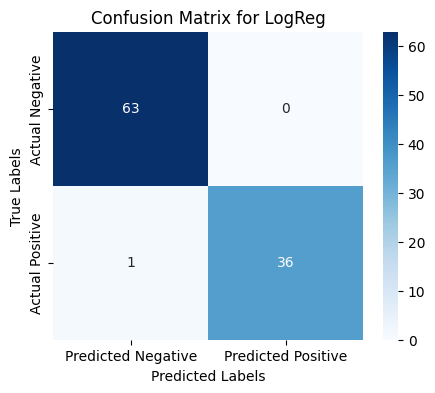

Testing Accuracy =  0.99



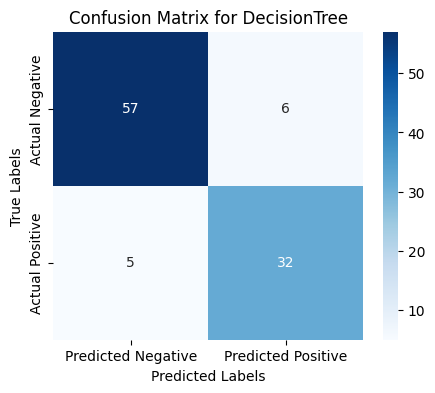

Testing Accuracy =  0.89



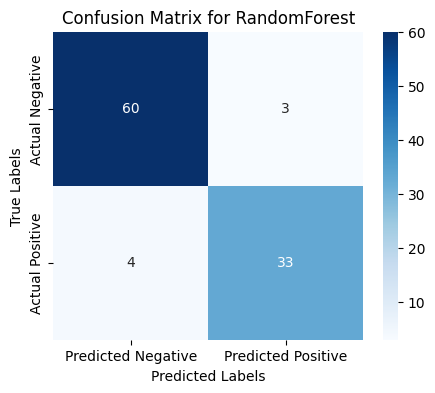

Testing Accuracy =  0.93



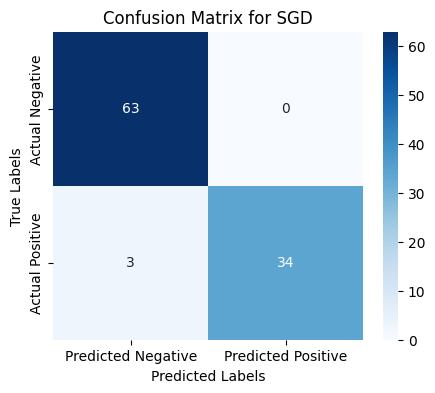

Testing Accuracy =  0.97



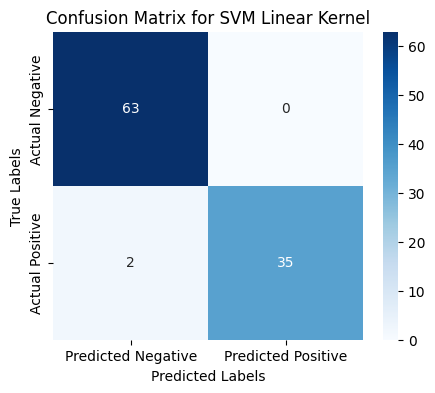

Testing Accuracy =  0.98



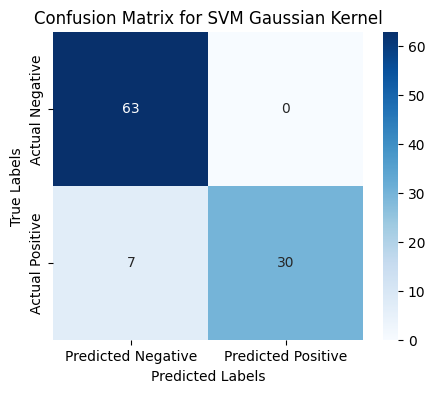

Testing Accuracy =  0.93



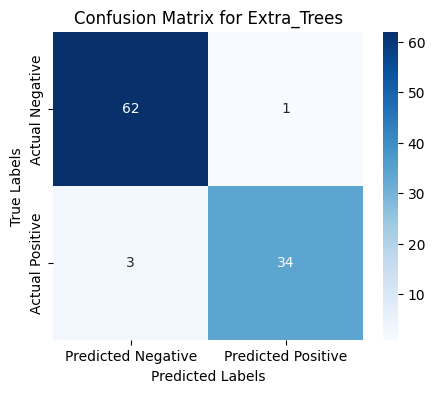

Testing Accuracy =  0.96



In [323]:
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import confusion_matrix  

# Function to plot confusion matrix  
def plot_confusion_matrix(y_true, y_pred, model_name):  
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
    yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()  

model_names = ['LogReg', 'DecisionTree', 'RandomForest', 'SGD', 'SVM Linear Kernel', 'SVM Gaussian Kernel', 'Extra_Trees']
for i in range(len(model)):
    #print("Model: ", model_names[i])
    y_pred = model[i].predict(x_test)
    plot_confusion_matrix(y_test, y_pred, model_names[i])

    # Calculate accuracy  
    cm = confusion_matrix(y_test, y_pred)  
    TP = cm[0][0]  
    TN = cm[1][1]  
    FN = cm[1][0]  
    FP = cm[0][1]  

    accuracy = (TP + TN) / (TP + TN + FN + FP)  
    print("Testing Accuracy = ", accuracy)  
    print()

In [116]:
# print the prediction of model-4
pred=model[4].predict(x_test)
print(pred)
print()
print(y_test)

[0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0]

249    0
405    0
51     0
400    1
157    0
      ..
516    1
255    1
365    1
289    0
513    0
Name: diagnosis, Length: 100, dtype: int64


# Building and Checking Different Models-2 (Tüm data, k-fold, farklı model/kodla)

For DT Model: Mean accuracy is 0.931869 (Std accuracy is 0.044378)
For SVM Model: Mean accuracy is 0.976549 (Std accuracy is 0.022209)
For NB Model: Mean accuracy is 0.944496 (Std accuracy is 0.019789)
For KNN Model: Mean accuracy is 0.968039 (Std accuracy is 0.021780)
For LogReg Model: Mean accuracy is 0.974422 (Std accuracy is 0.024805)
For RandomForest Model: Mean accuracy is 0.965957 (Std accuracy is 0.017021)


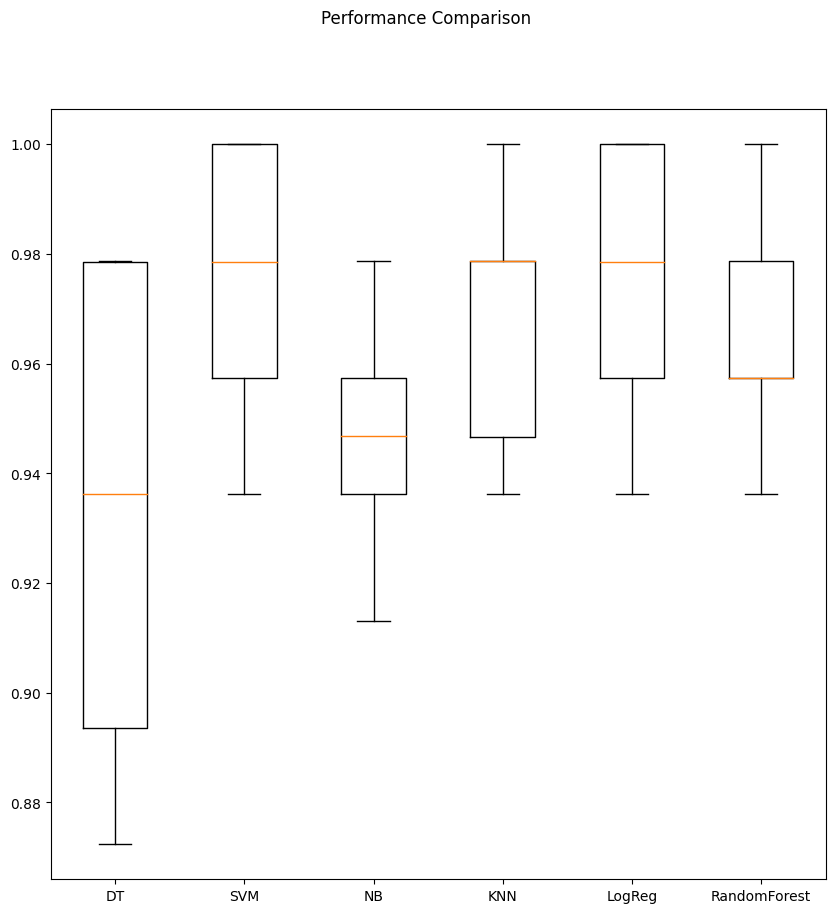


Model: DT
Accuracy score: 0.89
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.88      0.81      0.85        37

    accuracy                           0.89       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100

Confusion Matrix:
[[59  4]
 [ 7 30]]

Model: SVM
Accuracy score: 0.98
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.95      0.97        37

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix:
[[63  0]
 [ 2 35]]

Model: NB
Accuracy score: 0.9
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        6

In [118]:
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
 
X = df.drop('diagnosis', axis=1)  
Y = df['diagnosis'] 

# Y = df['diagnosis'].astype("float64").values  
# X = df.drop('diagnosis', axis=1).values  

# Standardization  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, stratify=Y, test_size=0.175, random_state=5)  

# Testing Options  
scoring = 'accuracy'  

# Define models to train  
models = [  
    ('DT', DecisionTreeClassifier()),  
    ('SVM', SVC(kernel = 'linear', C = 0.4)),  
    ('NB', GaussianNB()),  
    ('KNN', KNeighborsClassifier()),  
    ('LogReg', LogisticRegression()),  # Added Logistic Regression  
    ('RandomForest', RandomForestClassifier())  # Added Random Forest  
]  

# Evaluate models  
results = []  
names = []  
kfold = KFold(n_splits=10)  

for name, model in models:  
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)  
    names.append(name)  
    print(f"For {name} Model: Mean accuracy is {cv_results.mean():.6f} (Std accuracy is {cv_results.std():.6f})")  

plt.figure(figsize=(10, 10))  
plt.suptitle('Performance Comparison')  
plt.boxplot(results)  
plt.xticks(range(1, len(names) + 1), names)  
plt.show()  

# Predictions on validation dataset  
for name, model in models:  
    model.fit(X_train, Y_train)  
    predictions = model.predict(X_test)  
    print(f"\nModel: {name}")  
    print(f"Accuracy score: {accuracy_score(Y_test, predictions)}")  
    print(f"Classification report:\n{classification_report(Y_test, predictions)}")  
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, predictions)}")

In [119]:
import joblib  

# Modeli eğittikten sonra  
joblib.dump(models[4][1], 'LogReg_model_1hata.pkl')
joblib.dump(scaler, 'scaler1_hata.pkl')  

['scaler1_hata.pkl']

In [120]:
# Modeli ve scaler'ı yükleme  

model_loaded = joblib.load('LogReg_model_1hata.pkl')  
scaler = joblib.load('scaler1_hata.pkl')

In [121]:
predictions = model_loaded.predict(X_test)  
print(f"\nModel: {name}")  
print(f"Accuracy score: {accuracy_score(Y_test, predictions)}")  
print(f"Classification report:\n{classification_report(Y_test, predictions)}")  
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, predictions)}")


Model: RandomForest
Accuracy score: 0.99
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.97      0.99        37

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[63  0]
 [ 1 36]]


# Building Logistic Regression Model (All data)

In [123]:
# Separating features and target variable  
X = df.drop('diagnosis', axis=1)  
y = df['diagnosis'] 

In [124]:
X.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [125]:
# Splitting dataset into test and train set  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, stratify=y, random_state=5)  

In [126]:
# Feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

## Logistic Regression  

In [128]:
from sklearn.linear_model import LogisticRegression  
logReg = LogisticRegression(random_state=5)  

# Model training  
logReg.fit(X_train, y_train)  

LogisticRegression(random_state=5)

In [129]:
# Model evaluation  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
y_pred = logReg.predict(X_test) 

In [130]:
# Evaluating the model  
acc = accuracy_score(y_test, y_pred)  
pre = precision_score(y_test, y_pred)  
rec = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)

In [131]:
# Storing evaluation metrics to a dataframe  
results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],  
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])  

In [132]:
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.990291        1.0  0.973684  0.986667

In [133]:
# Cross validation  
from sklearn.model_selection import cross_val_score  
accuracies = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=10) 

In [134]:
accuracies

array([1.        , 0.9787234 , 1.        , 0.93617021, 1.        ,
       0.93617021, 0.97826087, 0.97826087, 0.97826087, 0.93478261])

In [135]:
accuracies.mean()

0.9720629047178537

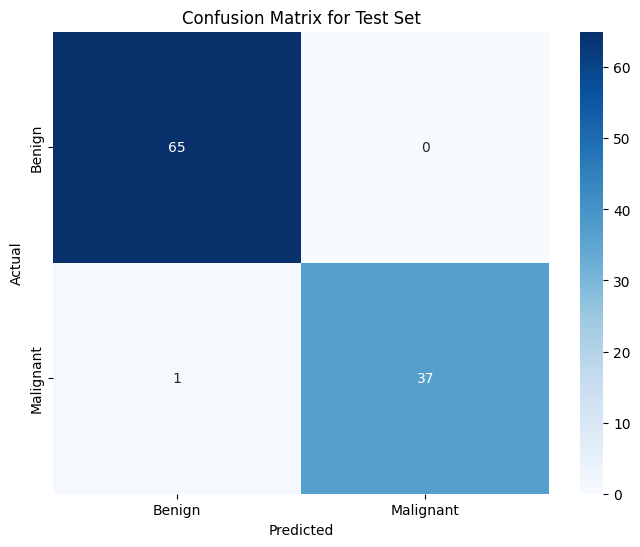

In [136]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Generating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)  

# Plotting the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix for Test Set')  
plt.show()

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.97      0.99        38

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



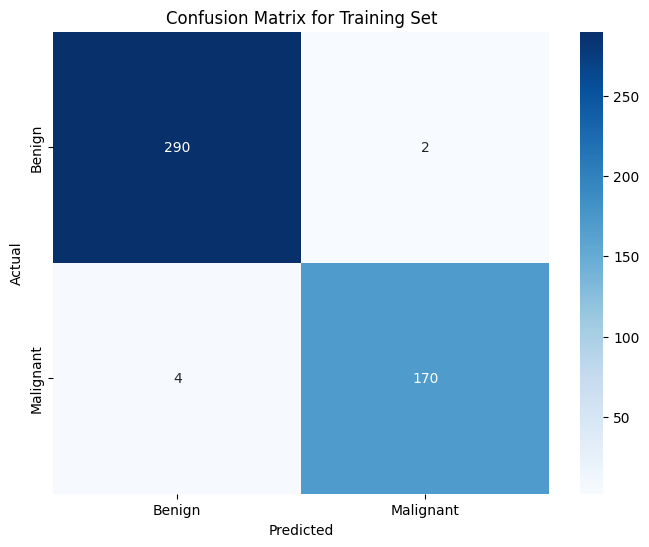

In [138]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

y_train_pred = logReg.predict(X_train) 

# Generating the confusion matrix for the training set  
cm_train = confusion_matrix(y_train, y_train_pred)  

# Plotting the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix for Training Set')  
plt.show()

In [139]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       292
           1       0.99      0.98      0.98       174

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466



In [140]:
# Make predictions on the train dataset  
y_train_pred = logReg.predict(X_train)  

# Calculate the number of errors  
errors = (y_train_pred != y_train).sum()  
print(f'Number of errors: {errors}') 

Number of errors: 6


## Final Model Building with selected 7 features (LogRes)

In [142]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

In [144]:
# Separating features and target variable  
X = df.drop('diagnosis', axis=1)  
y = df['diagnosis'] 

X = X[['worst_area', 'worst_radius', 'worst_perimeter', 'worst_concave_points', 'mean_concave_points', 
       'worst_texture', 'mean_concavity']]

In [145]:
X.columns

Index(['worst_area', 'worst_radius', 'worst_perimeter', 'worst_concave_points',
       'mean_concave_points', 'worst_texture', 'mean_concavity'],
      dtype='object')

In [146]:
# Splitting dataset into test and train set  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.175, stratify=y, random_state=5) 

# Feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [147]:
from sklearn.linear_model import LogisticRegression  
logReg_fs7 = LogisticRegression(random_state=5)  

# Model training  
logReg_fs7.fit(X_train, y_train)  

# Model evaluation  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
y_pred = logReg_fs7.predict(X_test) 

# Evaluating the model  
acc = accuracy_score(y_test, y_pred)  
pre = precision_score(y_test, y_pred)  
rec = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)

# Storing evaluation metrics to a dataframe  
logReg_fs7_results = pd.DataFrame([['LogReg_selected_7_features', acc, pre, rec, f1]],  
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']) 
logReg_fs7_results

Model  Accuracy  Precision    Recall  F1 Score
0  LogReg_selected_7_features      0.98   0.972973  0.972973  0.972973

In [148]:
# Cross validation  
from sklearn.model_selection import cross_val_score  
accuracy_scores = cross_val_score(estimator=logReg_fs7, X=X_train, y=y_train, cv=10) 
accuracy_scores

array([0.95744681, 0.95744681, 1.        , 1.        , 0.9787234 ,
       1.        , 0.95744681, 0.9787234 , 0.93617021, 1.        ])

In [149]:
accuracy_scores.mean()

0.9765957446808511

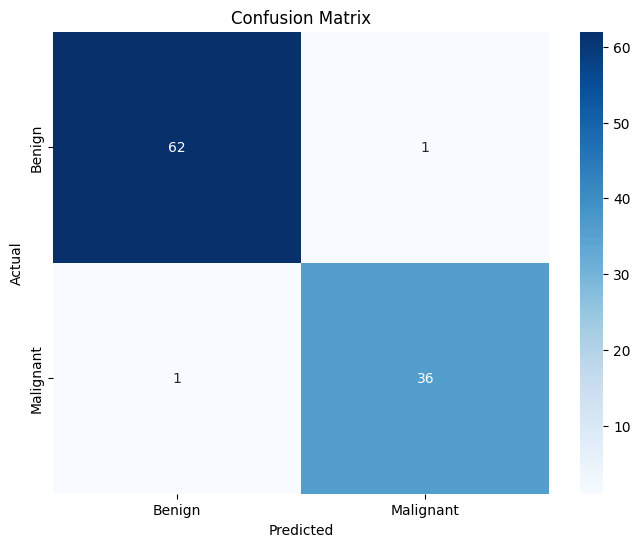

In [150]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Generating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)  

# Plotting the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.97      0.97      0.97        37

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



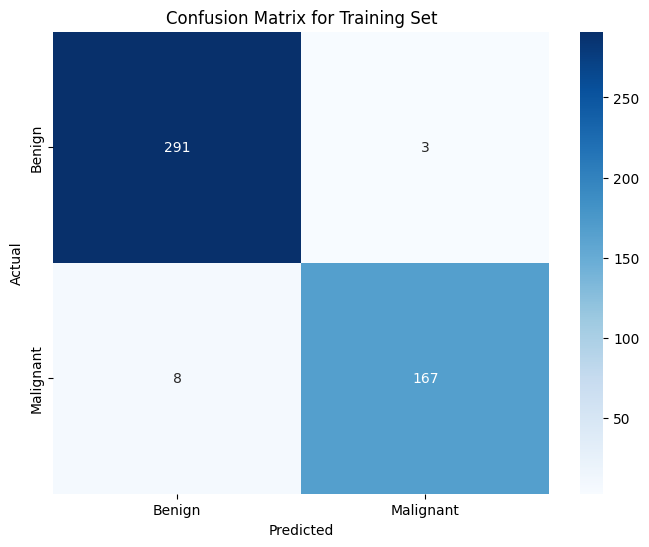

In [152]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

y_train_pred = logReg_fs7.predict(X_train) 

# Generating the confusion matrix for the training set  
cm_train = confusion_matrix(y_train, y_train_pred)  

# Plotting the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix for Training Set')  
plt.show()

In [153]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       294
           1       0.98      0.95      0.97       175

    accuracy                           0.98       469
   macro avg       0.98      0.97      0.97       469
weighted avg       0.98      0.98      0.98       469




### Gözlem(Observation)
İki olası sınıf vardır: Malign (Kötü Huylu) ve Benign (İyi Huylu).

* Sınıflandırıcı toplamda 100 tahmin yaptı (yani 100 hasta meme kanseri varlığı açısından test edildi).
                                                  
* Gerçekten 37 malign vakadan, sınıflandırıcı 36 tanesini doğru şekilde Malign olarak ve 1 tanesini yanlış şekilde Benign olarak tahmin etti.
* Gerçekten örnekte 37 hasta hastalığa sahipken, 63 hasta hastalığa sahip değildir.

### Karışıklık Matrisi'nden Hesaplanan Oranlar (Confusion Matrix)
1. **Doğruluk (Accuracy)**: Genel olarak sınıflandırıcı ne sıklıkla doğru tahmin yapıyor?
   * \((TP + TN) / 	ext{total} = (62 + 36) / 100 = 0.98\)

2. **Yanlış Sınıflandırma Oranı (Misclassification Rate)**: Genel olarak ne sıklıkla yanlış tahmin yapıyor?
   * \((FP + FN) / 	ext{total} = (1 + 1) / 100 = 0.02\) (Doğruluğun 1 eksiğine eşittir, ***"Hata Oranı"*** (Error Rate) olarak da bilinir)

3. **Gerçek Pozitif Oranı (True Positive Rate - Sensitivity or Recall)**: Gerçekten malign olduğunda, ne sıklıkla malign olarak tahmin ediliyor?
   * \(TP / 	ext{actual yes} = 36 / 37 pprox 0.973\)

4. **Yanlış Pozitif Oranı (False Positive Rate)**: Gerçekten benign olduğunda, ne sıklıkla malign olarak tahmin ediliyor?
   * \(FP / 	ext{actual no} = 1 / 63 pprox 0.0159\)

5. **Özgüllük (Specificity)**: Gerçekten benign olduğunda, ne sıklıkla benign olarak tahmin ediliyor?
   * \(TN / 	ext{actual no} = 62 / 63 pprox 0.984\) (Yanlış Pozitif Oranının 1 eksiğine eşittir)

6. **Kesinlik (Precision)**: Malign tahmin edildiğinde, bu tahminin ne sıklıkla doğru olduğunu gösterir.
   * \(TP / 	ext{predicted yes} = 36 / 37 pprox 0.973\)




# Egittimiz Modele Tahmin Yaptirma

In [156]:
pred_df = df[['diagnosis', 'worst_area', 'worst_radius', 'worst_perimeter', 'worst_concave_points', 'mean_concave_points', 
       'worst_texture', 'mean_concavity']]

In [157]:
pred_df.sample(5)

diagnosis  worst_area  worst_radius  worst_perimeter  \
7            1       897.0         17.06           110.60   
418          0       566.9         13.65            88.12   
96           0       495.2         12.83            82.14   
31           1       888.7         16.82           119.40   
148          0       766.9         15.85           108.60   

     worst_concave_points  mean_concave_points  worst_texture  mean_concavity  
7                 0.15560              0.05985          28.14         0.09366  
418               0.08224              0.02402          16.92         0.02360  
96                0.05882              0.02941          20.92         0.02490  
31                0.15460              0.05182          28.12         0.12180  
148               0.15990              0.05532          19.85         0.08487

In [158]:
sample_obs = [1844.0, 24.39, 162.10, 0.13740, 0.09246, 39.07, 0.15]  
# sample_obs = [762.6,	16.11,	105.90,	0.14230,	0.08534,	18.33,	0.113800] 
prediction = logReg_fs7.predict(scaler.transform([sample_obs]))  

# Tahmin Sonuclarını yazdırıyoruz. 
if prediction[0] == True:  
    print("Breast Cancer with the given observations is Malignant")  
else:  
    print("Breast Cancer with the given observations is Benign")

Breast Cancer with the given observations is Malignant


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# Modeli Kaydetme

In [160]:
import joblib  

# Modeli eğittikten sonra  
joblib.dump(logReg_fs7, 'logistic_regression_model7.pkl')

['logistic_regression_model7.pkl']

In [161]:
joblib.dump(scaler, 'scaler7.pkl') 

['scaler7.pkl']

## Hyperparameter Tuning for Logistic Regression (Daha iyi sonuç vermiyor.)

In [163]:
from sklearn.model_selection import GridSearchCV  

# Hiperparametrelerin tanımlanması  
param_grid = [  
    {  
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],  
        'solver': ['newton-cg', 'lbfgs'],  # Compatible solvers with 'l2'  
        'max_iter': [100, 200, 300, 500],  
        'class_weight': [None, 'balanced'],  
        'penalty': ['l2'],  # Only 'l2' is valid for these solvers  
        'tol': [1e-4, 1e-3, 1e-2]  
    },  
    {  
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],  
        'solver': ['liblinear'],  # Compatible solver with 'l1'  
        'max_iter': [100, 200, 300, 500],  
        'class_weight': [None, 'balanced'],  
        'penalty': ['l1'],  # Only 'l1' is valid for this solver  
        'tol': [1e-4, 1e-3, 1e-2]  
    },  
    {  
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],  
        'solver': ['saga'],  # Compatible solver with 'l1' and 'elasticnet'  
        'max_iter': [100, 200, 300, 500],  
        'class_weight': [None, 'balanced'],  
        'penalty': ['l1', 'elasticnet'],  # Valid for this solver  
        'tol': [1e-4, 1e-3, 1e-2]  
    }  
]  

# Grid Search ile hiperparametre ayarlama  
grid_search = GridSearchCV(estimator=logReg_fs7, param_grid=param_grid,   
                           scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

In [164]:
# Modeli eğitme  
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 840 candidates, totalling 8400 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


1680 fits failed out of a total of 8400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1182, in fit
    raise V

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 200, 300, 500], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs'],
                          'tol': [0.0001, 0.001, 0.01]},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 200, 300, 500], 'penalty': ['l1'],
                          'solver': ['liblinear'],
                          'tol': [0.0001, 0.001, 0.01]},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 200, 300, 500],
                          'penalty': ['l1', 'elasticnet'], 'solver': ['saga'],
                          'tol': [0.0001, 0.001, 0.01]}],
             scoring='accuracy', verbose=1)

In [165]:
# En iyi parametreleri ve skoru alma  
best_params = grid_search.best_params_  
best_score = grid_search.best_score_  

print("En iyi parametreler:", best_params)  
print("En iyi doğruluk skoru:", best_score) 

En iyi parametreler: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
En iyi doğruluk skoru: 0.9765957446808511


In [166]:
# En iyi modeli kullanarak tahmin yapma  
best_model = grid_search.best_estimator_  
y_pred_best = best_model.predict(X_test)  

# Yeni değerlendirme metrikleri  
acc_best = accuracy_score(y_test, y_pred_best)  
pre_best = precision_score(y_test, y_pred_best)  
rec_best = recall_score(y_test, y_pred_best)  
f1_best = f1_score(y_test, y_pred_best)  

# Sonuçları veri çerçevesine ekleme  
results_best = pd.DataFrame([['Logistic Regression (Tuned)', acc_best, pre_best, rec_best, f1_best]],  
                            columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_best

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Tuned)      0.98   0.972973  0.972973  0.972973

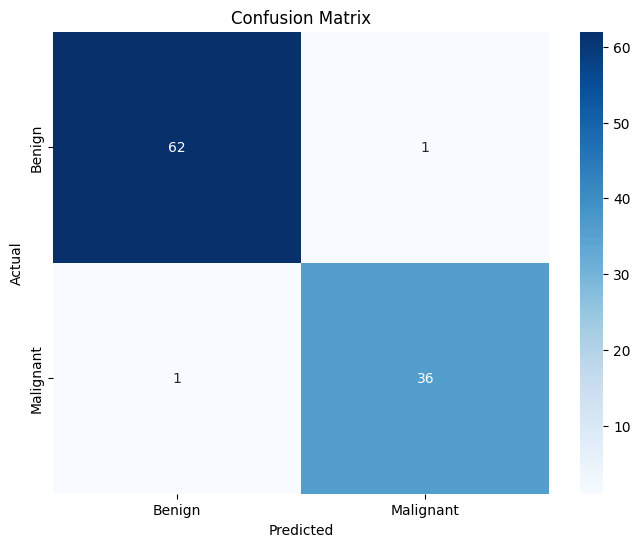

In [167]:
# Generating the confusion matrix  

cm = confusion_matrix(y_test, y_pred_best)  

# Plotting the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()

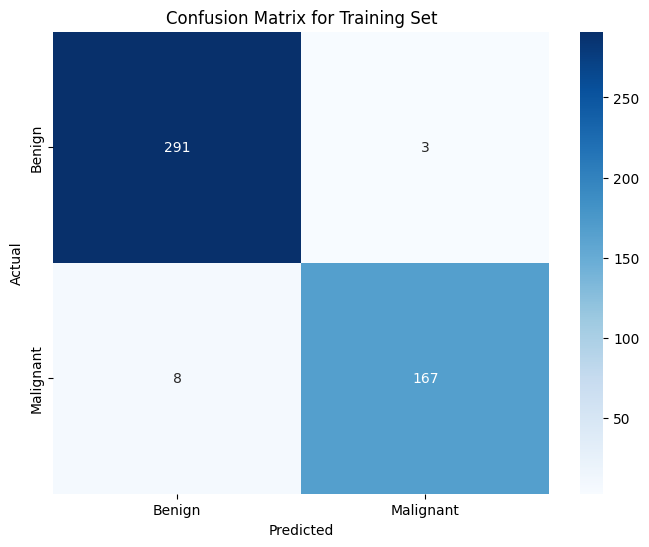

In [168]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

y_pred_best = best_model.predict(X_train) 

# Generating the confusion matrix for the training set  
cm_train = confusion_matrix(y_train, y_pred_best)  

# Plotting the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix for Training Set')  
plt.show()